**Title:** Energy Production Optimization in Combined-Cycle Power Plants

**Business Objective:**
The primary objective of this project is to model the energy generated in a combined-cycle power plant as a function of exhaust vacuum and ambient variables. By developing a predictive model, we aim to optimize the plant's performance and enhance its energy production efficiency.


The variables, or features, are the following:

**temperature**, in degrees Celsius.

**exhaust_vacuum**, in cm Hg.

**amb_pressure**, in millibar. (Ambient pressure)

**r_humidity**, in percentage. (Relative humidity)

**energy_production**, in MW, net hourly electrical energy output.



#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

#Loading Dataset

In [2]:
ep=pd.read_csv('/content/Regrerssion_energy_production_data.csv',delimiter=';')
ep

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0            9.59           38.56       1017.01       60.10             481.30
1           12.04           42.34       1019.72       94.67             465.36
2           13.87           45.08       1024.42       81.69             465.48
3           13.72           54.30       1017.89       79.08             467.05
4           15.14           49.64       1023.78       75.00             463.58
...           ...             ...           ...         ...                ...
9563        17.10           49.69       1005.53       81.82             457.32
9564        24.73           65.34       1015.42       52.80             446.92
9565        30.44           56.24       1005.19       56.24             429.34
9566        23.00           66.05       1020.61       80.29             421.57
9567        17.75           49.25       1020.86       63.67             454.41

[9568 rows x 5 columns]

In [3]:
ep.shape

(9568, 5)

In [4]:
ep.describe()

temperature  exhaust_vacuum  amb_pressure   r_humidity  \
count  9568.000000     9568.000000   9568.000000  9568.000000   
mean     19.651231       54.305804   1013.259078    73.308978   
std       7.452473       12.707893      5.938784    14.600269   
min       1.810000       25.360000    992.890000    25.560000   
25%      13.510000       41.740000   1009.100000    63.327500   
50%      20.345000       52.080000   1012.940000    74.975000   
75%      25.720000       66.540000   1017.260000    84.830000   
max      37.110000       81.560000   1033.300000   100.160000   

       energy_production  
count        9568.000000  
mean          454.365009  
std            17.066995  
min           420.260000  
25%           439.750000  
50%           451.550000  
75%           468.430000  
max           495.760000

The data file combined_cycle_power_plant.csv contains 9568 samples with five variables collected from a combined cycle power plant over six years when the power plant was set to work with a full load. The measurements were taken every second.

The variables, or features, are the following:
1.   temperature, in degrees Celsius
2.  exhaust_vacuum, in cm Hg.
3.   ambient_pressure, in millibar.
4.   relative_humidity, in percentage.
5.   energy, in MW, net hourly electrical energy output.

#EDA and visualization

In [5]:
ep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


#duplicates

In [6]:
ep[ep.duplicated()]

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
2066        10.72           41.17       1019.68       60.71             479.21
2780        28.41           75.60       1018.48       56.07             440.28
3333        24.79           75.60       1017.07       68.23             440.05
3467         7.64           41.17       1020.01       75.14             488.53
3550        25.42           75.60       1017.39       77.63             438.24
3747        11.61           41.17       1019.57       58.82             476.81
4292        12.27           41.17       1019.41       58.10             475.13
4528        24.63           59.57       1010.45       85.36             440.67
5065         8.57           41.17       1020.18       72.47             484.20
5564        11.82           41.17       1019.50       55.74             475.61
5812        25.21           75.60       1017.19       69.84             445.84
5975         7.87           41.17       1020.33       77.77             486.20
5983         6.86           41.17       1020.12       79.14             490.23
6413        28.84           75.60       1018.41       53.96             442.69
6861        11.23           41.17       1019.36       56.85             475.85
6948        25.56           75.60       1017.37       69.31             442.20
7065         9.83           41.17       1019.34       72.29             478.21
7124        26.12           75.60       1017.41       72.31             439.68
7231        29.23           75.60       1017.72       52.26             438.92
7274        12.19           41.17       1019.43       65.47             475.64
7453        26.45           75.60       1017.42       74.50             436.89
7675         6.06           41.17       1019.67       84.70             489.62
7732        29.51           75.60       1017.92       50.61             431.18
7779        12.11           41.17       1019.46       62.59             475.53
7821        28.37           75.60       1017.48       55.19             439.25
7839         8.44           41.17       1019.90       70.72             486.15
7843        29.05           75.60       1017.63       51.16             439.14
7907         8.07           41.17       1019.40       86.43             484.54
7948        26.85           75.60       1017.43       74.55             433.48
8212        27.54           75.60       1018.26       57.89             440.87
8290         7.24           41.17       1020.35       80.56             486.76
8542        25.79           75.60       1017.46       75.63             434.65
8777        25.53           59.57       1010.65       82.04             445.59
8879         9.54           41.17       1019.79       65.61             481.18
9028         6.40           41.17       1019.54       85.37             488.82
9154        29.45           75.60       1018.12       50.68             437.31
9163         6.03           41.17       1019.81       84.20             488.57
9272        12.00           41.17       1019.48       58.71             474.40
9482        12.27           41.17       1019.39       52.18             473.84
9521        27.64           75.60       1017.35       54.78             441.04
9537        25.91           75.60       1018.23       62.65             443.20

In [ ]:
ep[ep.duplicated()].shape

In [7]:
ep_cleaned1=ep.drop_duplicates()

In [8]:
ep_cleaned1.shape

(9527, 5)

# Pair plot

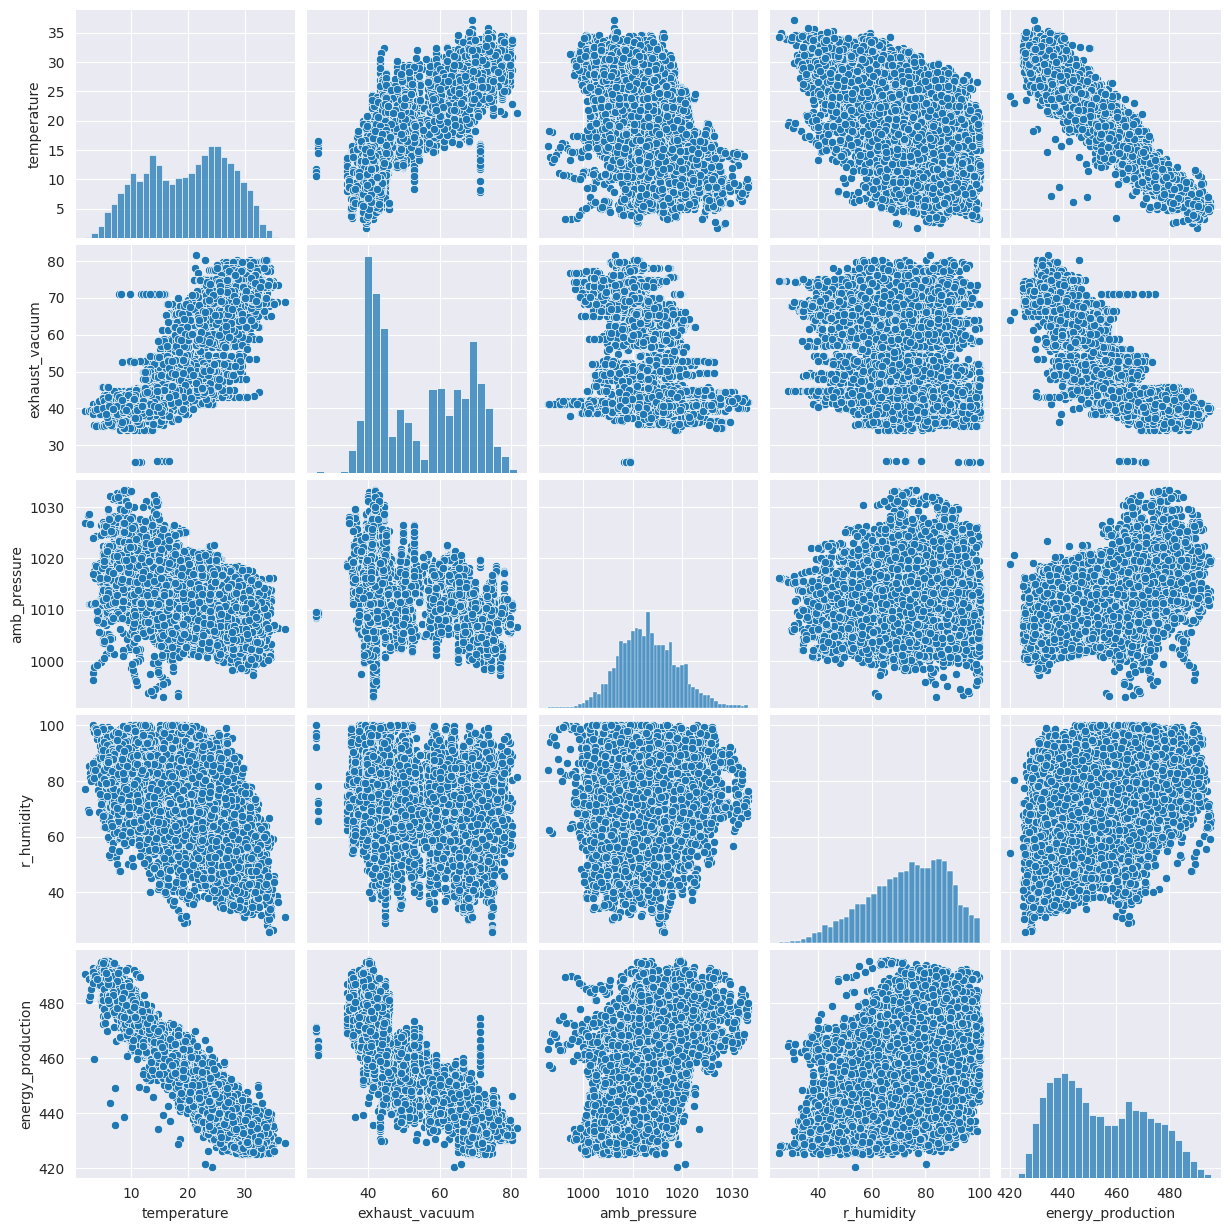

In [9]:
sns.set_style(style='darkgrid')
sns.pairplot(ep_cleaned1)

#Scatter plot

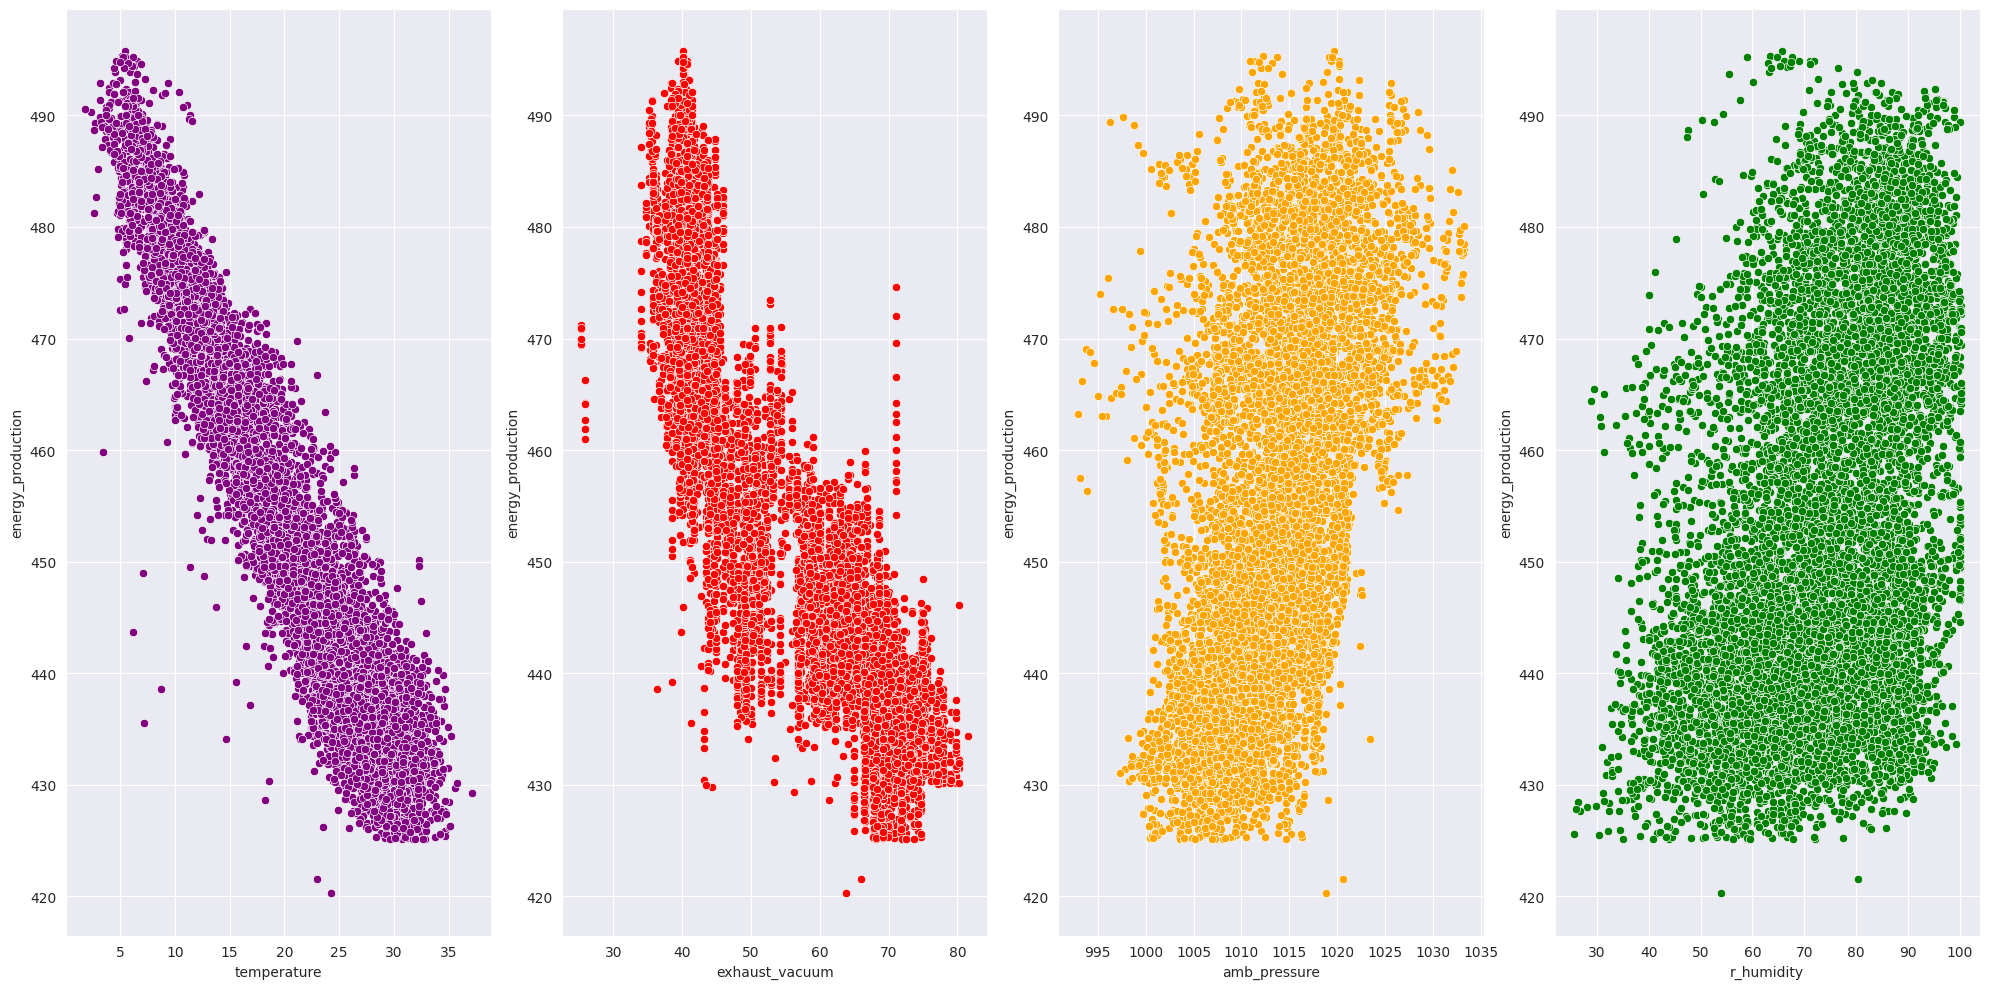

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
sns.scatterplot(x='temperature',y='energy_production',data=ep_cleaned1,color='purple')

plt.subplot(1,4,2)
sns.scatterplot(x='exhaust_vacuum',y='energy_production',data=ep_cleaned1,color='red')

plt.subplot(1,4,3)
sns.scatterplot(x='amb_pressure',y='energy_production',data=ep_cleaned1,color='orange')

plt.subplot(1,4,4)
sns.scatterplot(x='r_humidity',y='energy_production',data=ep_cleaned1,color='green')

plt.tight_layout()
plt.show()

#Distribution Plots:


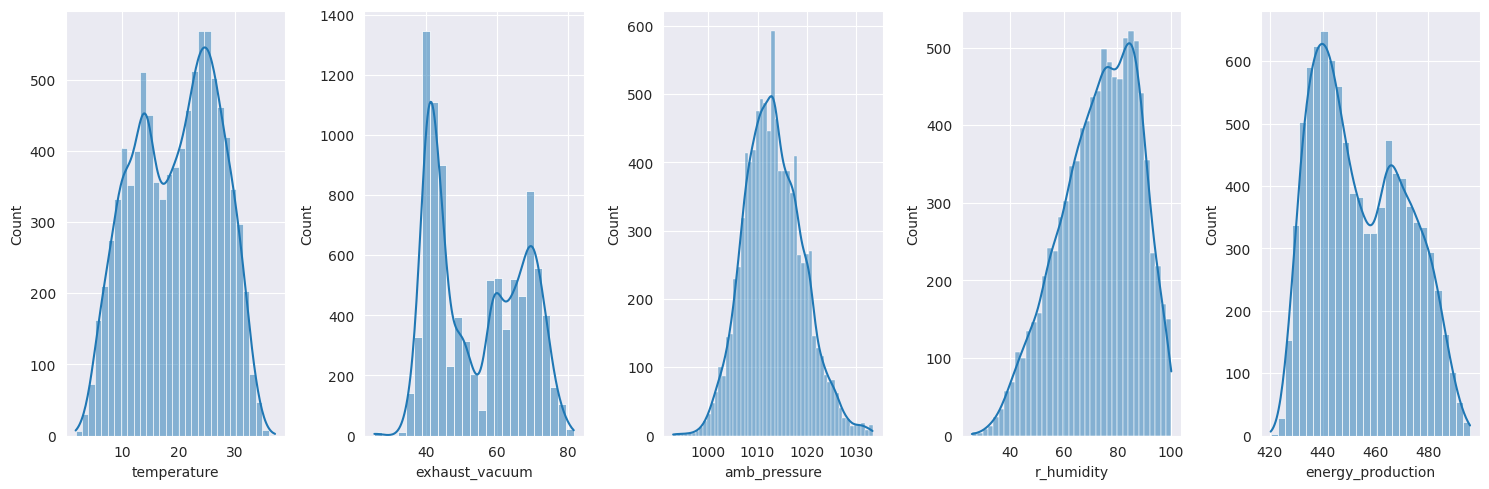

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 5, 1)
sns.histplot(ep_cleaned1['temperature'], kde=True)

plt.subplot(1, 5, 2)
sns.histplot(ep_cleaned1['exhaust_vacuum'], kde=True)

plt.subplot(1, 5, 3)
sns.histplot(ep_cleaned1['amb_pressure'], kde=True)

plt.subplot(1, 5, 4)
sns.histplot(ep_cleaned1['r_humidity'], kde=True)

plt.subplot(1, 5, 5)
sns.histplot(ep_cleaned1['energy_production'], kde=True)

plt.tight_layout()
plt.show()

#Line plot

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
sns.lineplot(x='temperature',y='energy_production',data=ep_cleaned1,color='blue')

plt.subplot(1,4,2)
sns.lineplot(x='exhaust_vacuum',y='energy_production',data=ep_cleaned1,color='red')

plt.subplot(1,4,3)
sns.lineplot(x='amb_pressure',y='energy_production',data=ep_cleaned1,color='orange')

plt.subplot(1,4,4)
sns.lineplot(x='r_humidity',y='energy_production',data=ep_cleaned1,color='green')
plt.show()

line plot is used to show the trend of variable over contineous intervals

#Violinplot

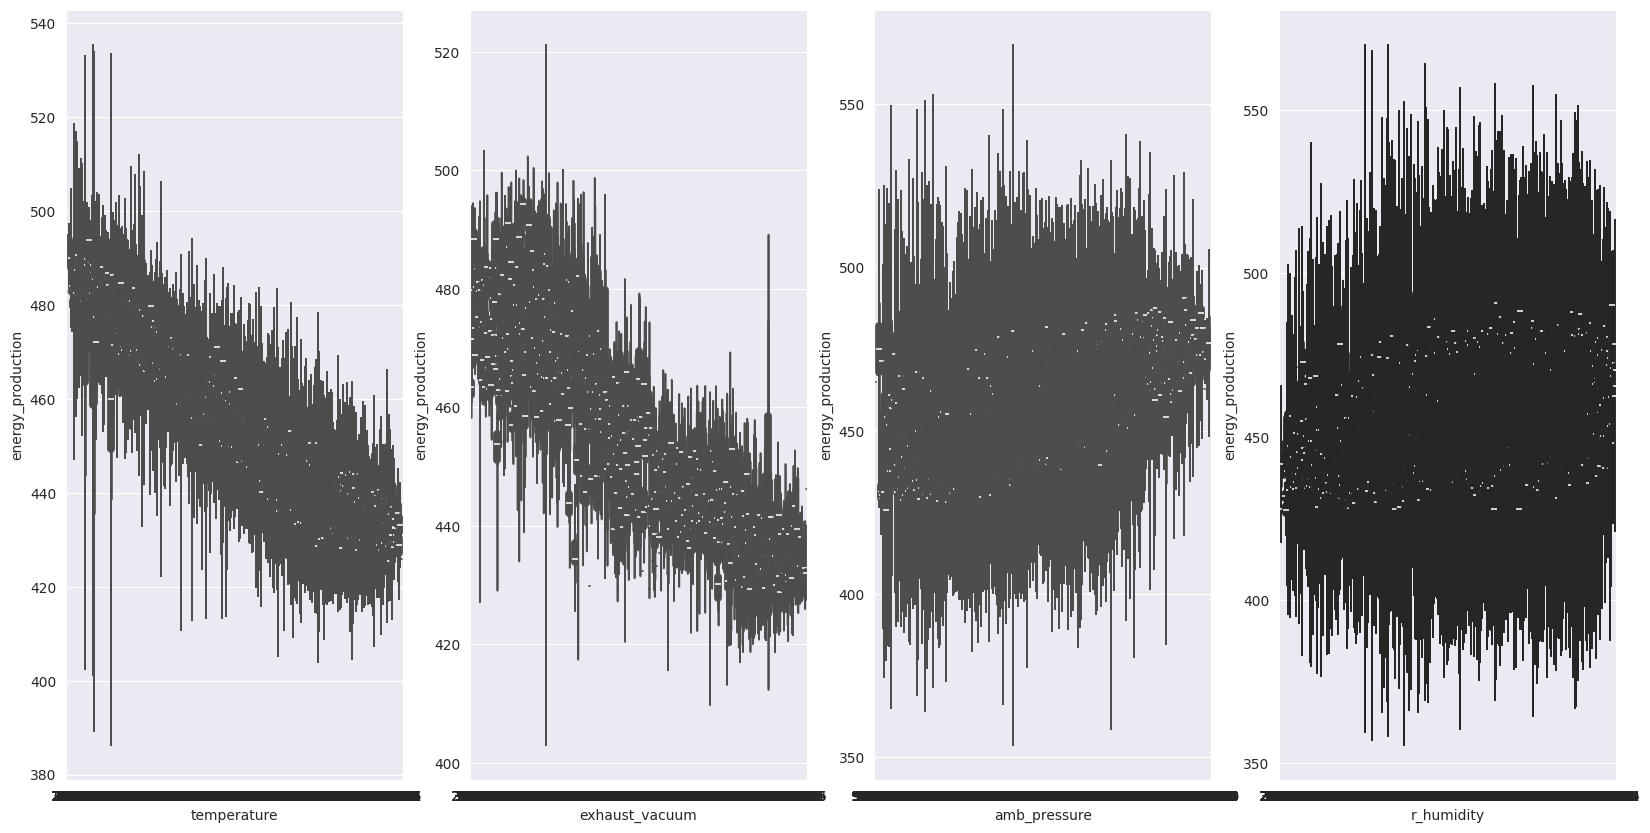

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
sns.violinplot(x='temperature',y='energy_production',data=ep_cleaned1,color='blue')

plt.subplot(1,4,2)
sns.violinplot(x='exhaust_vacuum',y='energy_production',data=ep_cleaned1,color='red')

plt.subplot(1,4,3)
sns.violinplot(x='amb_pressure',y='energy_production',data=ep_cleaned1,color='orange')

plt.subplot(1,4,4)
sns.violinplot(x='r_humidity',y='energy_production',data=ep_cleaned1,color='green')
plt.show()

#Joint plot

<Figure size 1500x500 with 0 Axes>

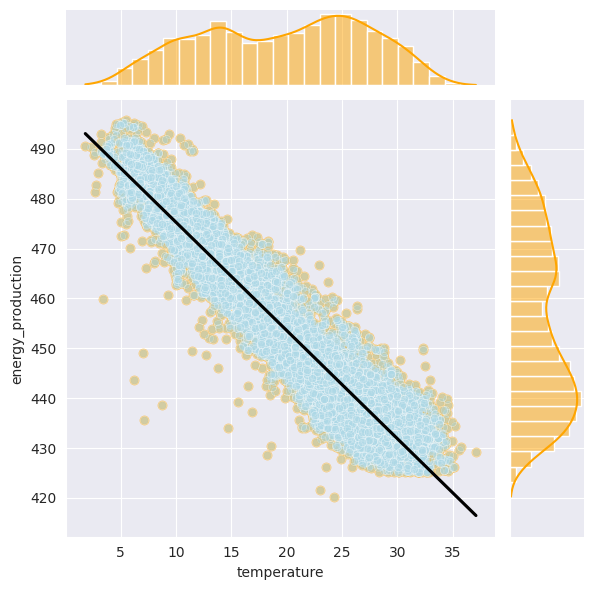

In [ ]:
plt.figure(figsize=(15, 5))
g=sns.jointplot(x='temperature', y='energy_production', data=ep_cleaned1, kind='reg',
              scatter_kws={'alpha': 0.6, 'color': 'orange'},
              joint_kws={'color': 'black'},
              marginal_kws=dict(bins=25, color='orange'))
g.plot_joint(sns.scatterplot, color='lightblue', alpha=0.5)
plt.show();

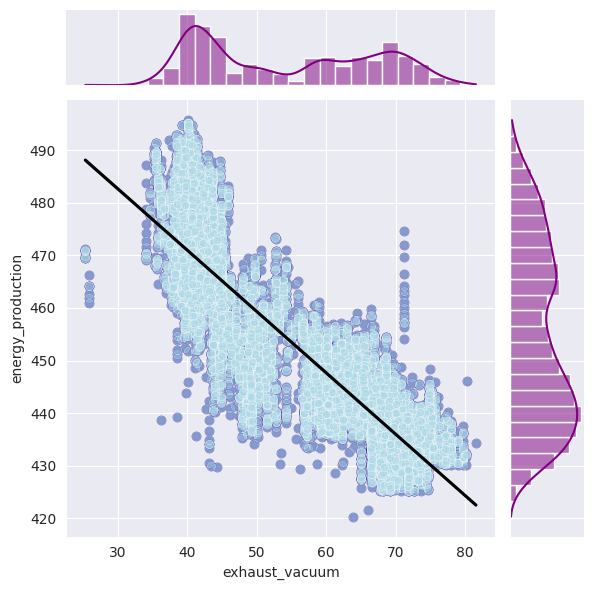

In [ ]:
g1=sns.jointplot(x='exhaust_vacuum', y='energy_production', data=ep_cleaned1, kind='reg',
              scatter_kws={'alpha': 0.6, 'color': 'darkblue'},
              joint_kws={'color': 'black'},
              marginal_kws=dict(bins=25, color='purple'))
g1.plot_joint(sns.scatterplot, color='lightblue', alpha=0.5)
plt.show();

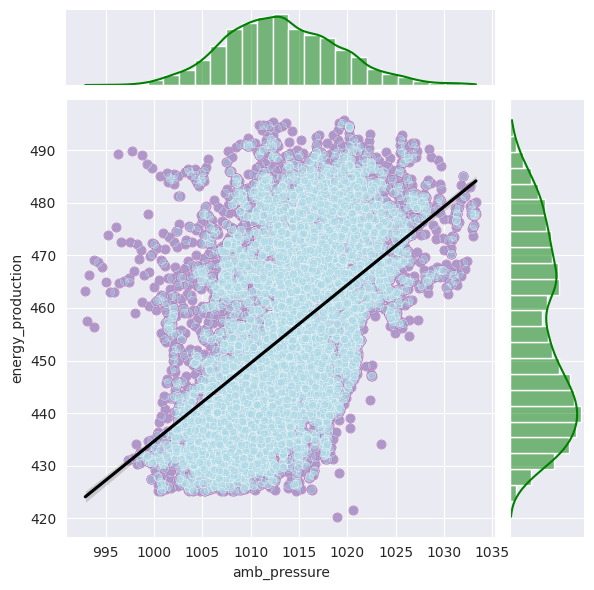

In [ ]:
g2=sns.jointplot(x='amb_pressure', y='energy_production', data=ep_cleaned1, kind='reg',
              scatter_kws={'alpha': 0.6, 'color': 'purple'},
              joint_kws={'color': 'black'},
              marginal_kws=dict(bins=25, color='green'))
g2.plot_joint(sns.scatterplot, color='lightblue', alpha=0.5)
plt.show();

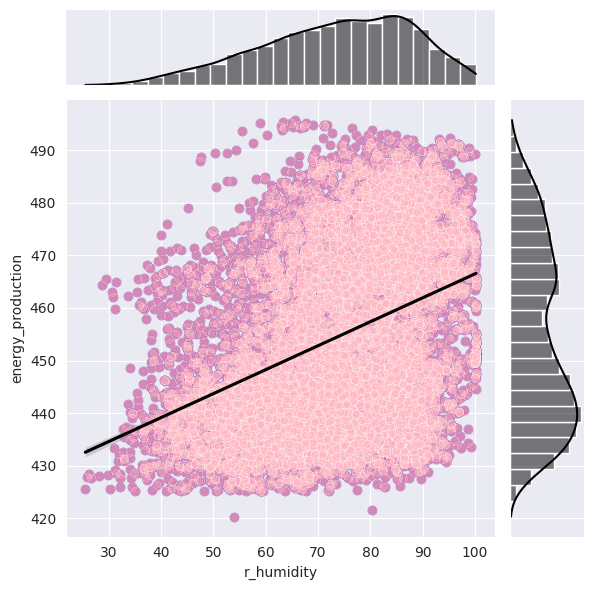

In [ ]:
g3=sns.jointplot(x='r_humidity', y='energy_production', data=ep_cleaned1, kind='reg',
              scatter_kws={'alpha': 0.6, 'color': 'purple'},
              joint_kws={'color': 'black'},
              marginal_kws=dict(bins=25, color='black'))
g3.plot_joint(sns.scatterplot, color='lightpink', alpha=0.5)
plt.show();

From the above visualization we can observe that as temperature and vacuum is increasing energy production is decreasing and as humidity and pressure is increasing enegry production is also increasing.

In [ ]:
import plotly.express as px

fig = px.scatter(ep_cleaned1, x='temperature', y='energy_production', color='exhaust_vacuum',
                 title='Interactive Scatter Plot with Color',
                 labels={'temperature': 'Temperature (Celsius)', 'energy_production': 'Energy Production (MW)'},
                 hover_name=ep_cleaned1.index)

# Update layout for better visualization
fig.update_layout(
    title='Interactive Scatter Plot with Color',
    xaxis=dict(title='Temperature (Celsius)'),
    yaxis=dict(title='Energy Production (MW)'),
    hovermode='closest'
)

# Show the interactive plot
fig.show()


This code uses Plotly Express to create an interactive scatter plot. The plot allow us to hover over points to see specific data points and zoom in/out.In this plot we can observe the production of energy with respect to temperature and exhaust vacuum.As both temperature and vacuum are increasing the energy production is decreasing

In [ ]:
import plotly.express as px


fig = px.scatter(ep_cleaned1, x='amb_pressure', y='energy_production', color='r_humidity',
                 title='Interactive Scatter Plot with Color',
                 labels={'amb_pressure': 'Pressure(Millibar)', 'energy_production': 'Energy Production (MW)'},
                 hover_name=ep_cleaned1.index)

# Update layout for better visualization
fig.update_layout(
    title='Interactive Scatter Plot with Color',
    xaxis=dict(title='Pressure(Millibar)'),
    yaxis=dict(title='Energy Production (MW)'),
    hovermode='closest'
)

# Show the interactive plot
fig.show()


This code uses Plotly Express to create an interactive scatter plot. The plot allow us to hover over points to see specific data points and zoom in/out.In this plot we can observe the production of energy with respect to ambient pressure and relative humidity.From the above plot we can observe that humidity is playing a major role in the production of energy

#3D Plot

In [ ]:

fig = px.scatter_3d(ep_cleaned1, x='temperature', y='exhaust_vacuum', z='r_humidity',
                    color='energy_production', size_max=30, opacity=0.7,
                    title='3D Scatter Plot: Energy Production vs Temperature, Exhaust Vacuum, and Relative Humidity',
                    labels={'temperature': 'Temperature (Celsius)', 'exhaust_vacuum': 'Exhaust Vacuum (cm Hg)', 'r_humidity': 'Relative Humidity', 'energy_production': 'Energy Production (MW)'},
                    hover_name=ep_cleaned1.index)

# Show the interactive plot
fig.show()


In [ ]:
fig = px.scatter_3d(ep_cleaned1, x='temperature', y='amb_pressure', z='r_humidity',
                    color='energy_production', size_max=30, opacity=0.7,
                    title='3D Scatter Plot: Energy Production vs Temperature, Ambient Pressure, and Relative Humidity',
                    labels={'temperature': 'Temperature (Celsius)', 'amb_pressure': 'Ambient Pressure', 'r_humidity': 'Relative Humidity', 'energy_production': 'Energy Production (MW)'},
                    hover_name=ep_cleaned1.index)

# Show the interactive plot
fig.show()


In [ ]:
fig = px.scatter_3d(ep_cleaned1, x='exhaust_vacuum', y='amb_pressure', z='r_humidity',
                    color='energy_production', size_max=30, opacity=0.7,
                    title='3D Scatter Plot: Energy Production vs Exhaust Vacuum, Ambient Pressure and Relative Humidity',
                    labels={ 'exhaust_vacuum': 'Exhaust Vacuum (cm Hg)','amb_pressure':'Ambient Pressure', 'r_humidity': 'Relative Humidity', 'energy_production': 'Energy Production (MW)'},
                    hover_name=ep_cleaned1.index)

# Show the interactive plot
fig.show()



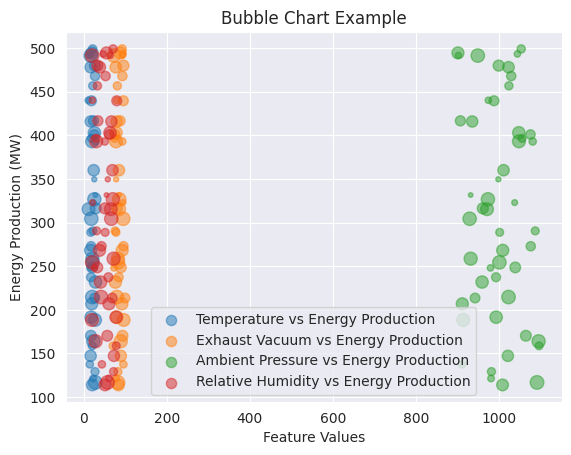

In [ ]:

temperature = np.random.uniform(10, 30, 50)
exhaust_vacuum = np.random.uniform(70, 100, 50)
amb_pressure = np.random.uniform(900, 1100, 50)
r_humidity = np.random.uniform(20, 80, 50)
energy_production = np.random.uniform(100, 500, 50)

# Bubble sizes (scaled for better visualization)
bubble_sizes = np.random.uniform(10, 100, 50)

# Scatter plot with bubble sizes
plt.scatter(temperature, energy_production, s=bubble_sizes, alpha=0.5, label='Temperature vs Energy Production')
plt.scatter(exhaust_vacuum, energy_production, s=bubble_sizes, alpha=0.5, label='Exhaust Vacuum vs Energy Production')
plt.scatter(amb_pressure, energy_production, s=bubble_sizes, alpha=0.5, label='Ambient Pressure vs Energy Production')
plt.scatter(r_humidity, energy_production, s=bubble_sizes, alpha=0.5, label='Relative Humidity vs Energy Production')

# Add labels and title
plt.xlabel('Feature Values')
plt.ylabel('Energy Production (MW)')
plt.title('Bubble Chart Example')

# Add legend
plt.legend()

# Display the plot
plt.show()


#Outlier detection and treatement

#1.Histogram

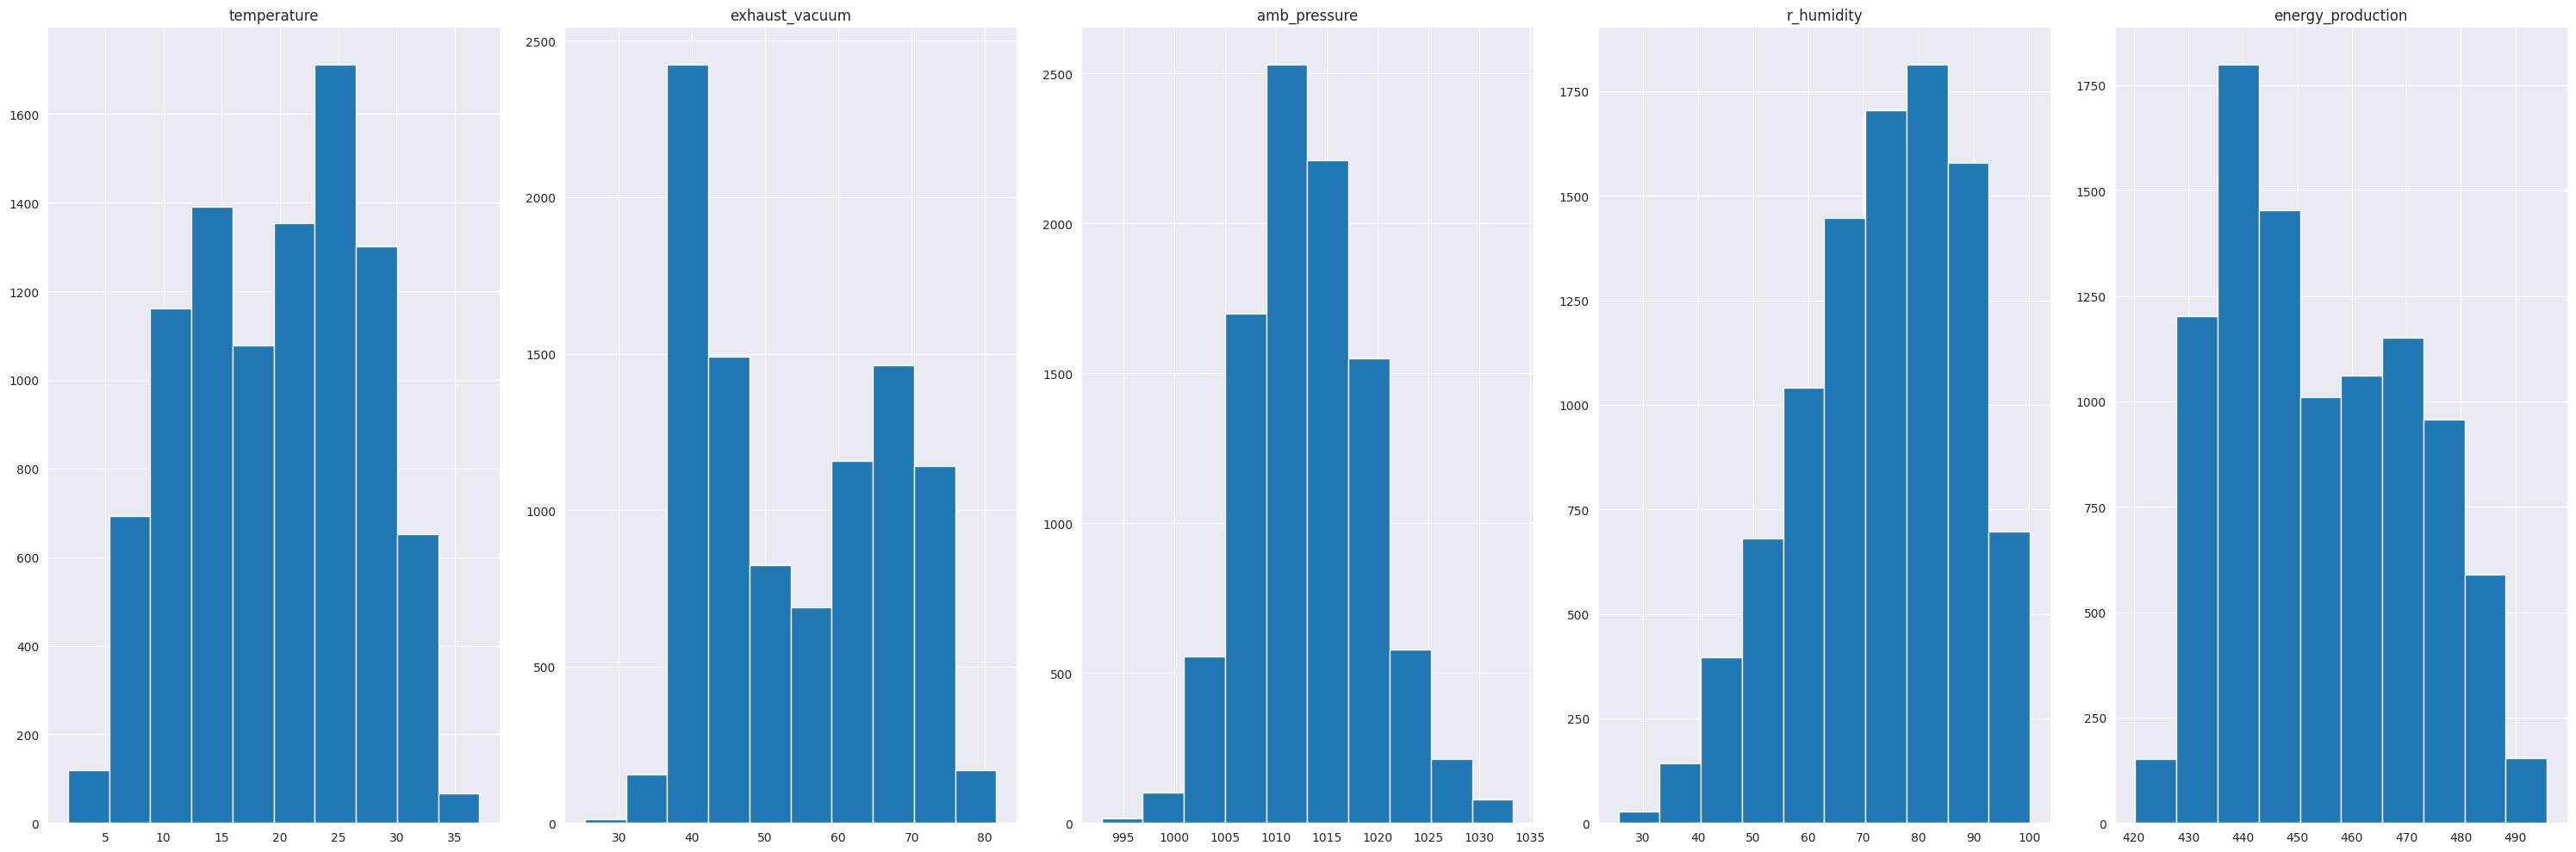

In [ ]:
plt.figure(figsize=(30,10))
plt.subplot(1,5,1)
ep_cleaned1['temperature'].hist()
plt.title('temperature')

plt.subplot(1,5,2)
ep_cleaned1['exhaust_vacuum'].hist()
plt.title('exhaust_vacuum')

plt.subplot(1,5,3)
ep_cleaned1['amb_pressure'].hist()
plt.title('amb_pressure')

plt.subplot(1,5,4)
ep_cleaned1['r_humidity'].hist()
plt.title('r_humidity')

plt.subplot(1,5,5)
ep_cleaned1['energy_production'].hist()
plt.title('energy_production')

plt.tight_layout()
plt.show()

#2.Boxplot

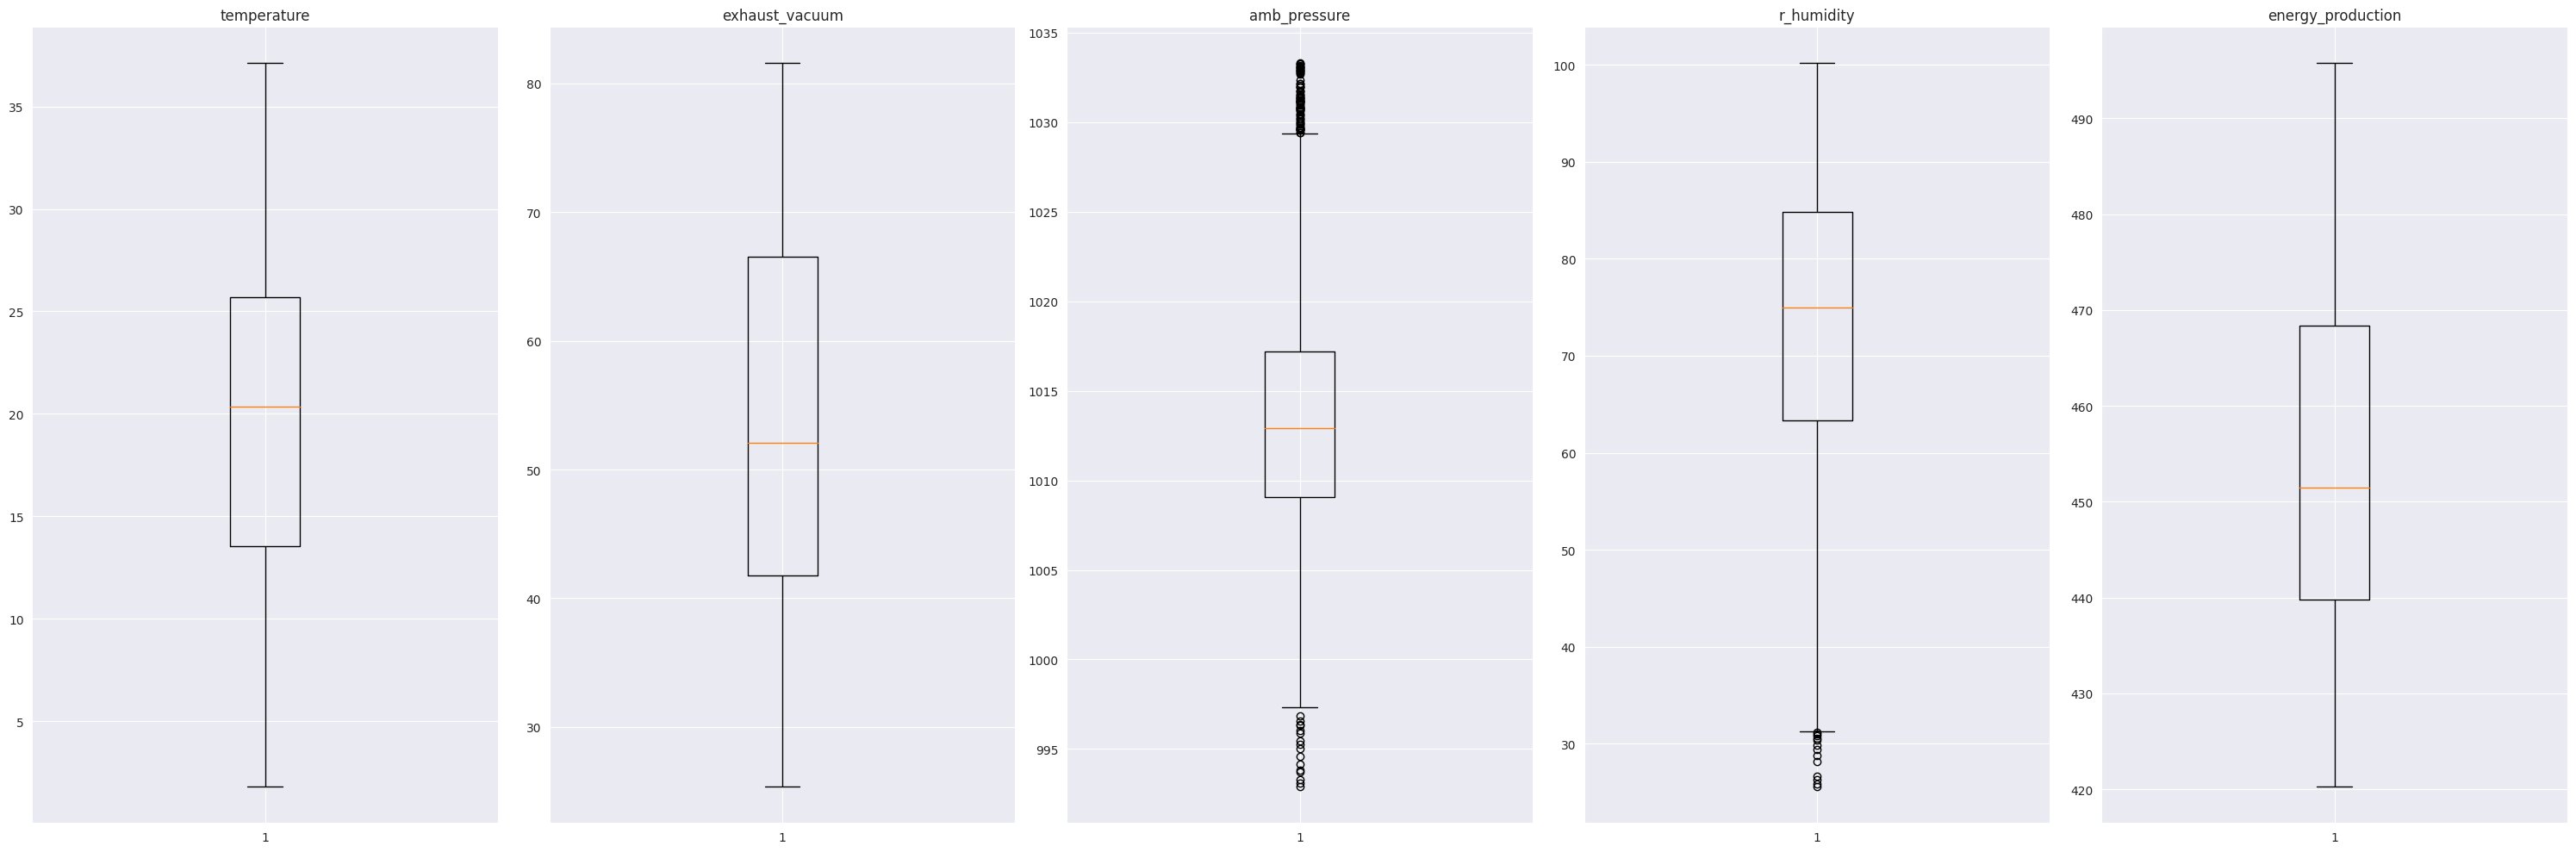

In [ ]:
plt.figure(figsize=(30,10))
plt.subplot(1,5,1)
plt.boxplot(ep_cleaned1['temperature'])
plt.title('temperature')

plt.subplot(1,5,2)
plt.boxplot(ep_cleaned1['exhaust_vacuum'])
plt.title('exhaust_vacuum')

plt.subplot(1,5,3)
plt.boxplot(ep_cleaned1['amb_pressure'])
plt.title('amb_pressure')

plt.subplot(1,5,4)
plt.boxplot(ep_cleaned1['r_humidity'])
plt.title('r_humidity')

plt.subplot(1,5,5)
plt.boxplot(ep_cleaned1['energy_production'])
plt.title('energy_production')

plt.tight_layout()
plt.show()

Their are outliers present in the pressure and humidity columns .To treat this we will perform suitable outlier treatment methods.



1.   **Treating amb_pressure outliers**



Text(0.5, 1.0, 'amb_pressure')

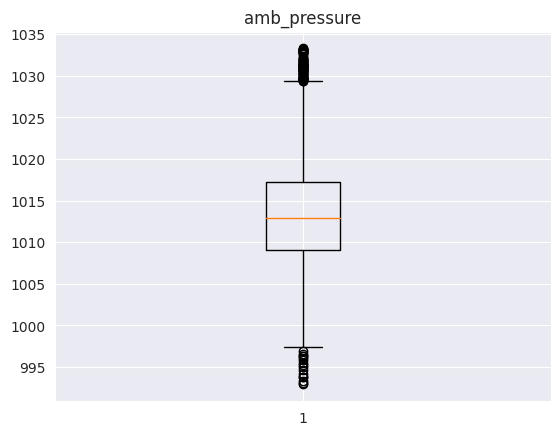

In [ ]:
plt.boxplot(ep_cleaned1['amb_pressure'])
plt.title('amb_pressure')

In [ ]:
Q1 = ep_cleaned1.amb_pressure.quantile(0.25)
Q3 = ep_cleaned1.amb_pressure.quantile(0.75)
Q1,Q3

(1009.085, 1017.2)

In [ ]:
IQR = Q3-Q1
print(IQR)

8.115000000000009


In [ ]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print('lower limit:',lower_limit ,'\nupper limit' , upper_limit)
ep_cleaned1[(ep_cleaned1.amb_pressure<lower_limit)|(ep_cleaned1.amb_pressure>upper_limit)]


lower limit: 996.9125 
upper limit 1029.3725


temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
38           9.95           41.82       1033.09       69.44             477.52
175          9.06           41.92       1029.90       90.88             473.37
315         14.46           42.86       1031.34       69.84             464.44
319         14.58           41.92       1030.42       61.96             462.69
385         14.20           42.86       1031.96       69.59             468.63
...           ...             ...           ...         ...                ...
9093         9.42           41.40       1030.38       87.80             472.99
9125         7.66           41.92       1031.96       82.48             485.11
9331         5.97           36.25       1029.65       86.74             487.03
9368        14.31           42.86       1031.14       69.60             465.36
9501        12.02           41.92       1030.10       84.45             465.82

[91 rows x 5 columns]

In [ ]:
#91 outliers are present in amb_pressure

In [ ]:
import numpy as np
median= float(ep_cleaned1['amb_pressure'].median())
ep_cleaned1['amb_pressure']=np.where(ep_cleaned1['amb_pressure']>upper_limit,median,ep_cleaned1['amb_pressure'])
ep_cleaned1['amb_pressure']=np.where(ep_cleaned1['amb_pressure']<lower_limit,median,ep_cleaned1['amb_pressure'])

<ipython-input-35-c5a29a0616c3>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-35-c5a29a0616c3>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



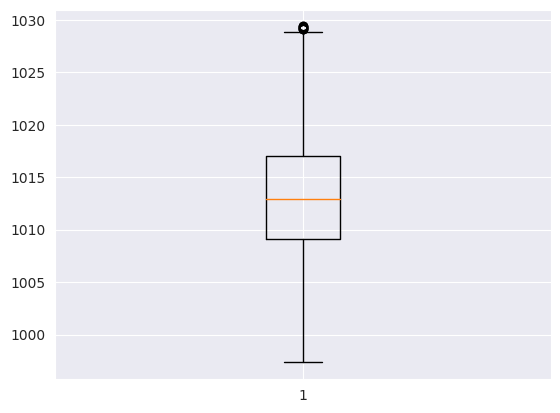

In [ ]:
data_box=ep_cleaned1.dropna()
data1_box=data_box.amb_pressure
box2=plt.boxplot(data1_box)
plt.show()

In [ ]:
[item.get_ydata() for item in box2['fliers']]

[array([1029.36, 1029.21, 1029.32, 1029.08, 1029.14, 1029.16, 1029.31,
        1029.36])]

In [ ]:
ep_cleaned1.drop(ep_cleaned1.index[ep_cleaned1['amb_pressure']>1029], inplace=True)

<ipython-input-38-b40cb34724bb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



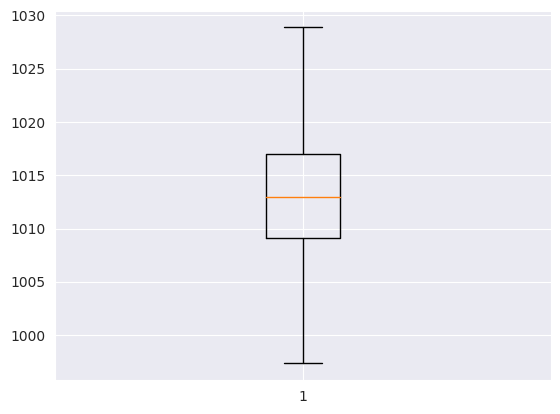

In [ ]:
data_box=ep_cleaned1.dropna()
data1_box=data_box.amb_pressure
box2=plt.boxplot(data1_box)
plt.show()

In [ ]:
[item.get_ydata() for item in box2['fliers']]

[array([], dtype=float64)]

amp_pressure -data is clean now we have imputed the outliers with median

2.   **Treating r_humidity outliers**

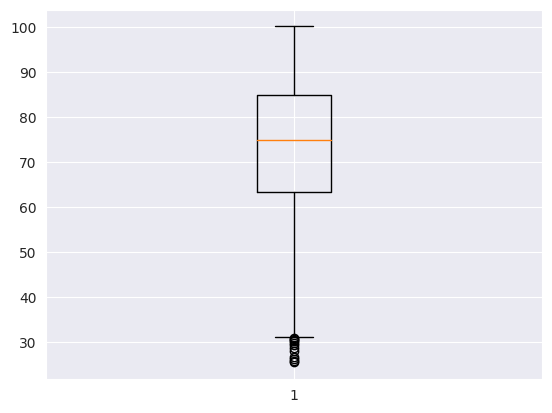

In [ ]:
#boxplot
data_box=ep_cleaned1.dropna()
data1_box=data_box.r_humidity
box2=plt.boxplot(data1_box)
plt.show()

In [ ]:
[item.get_ydata() for item in box2['fliers']]

[array([28.16, 26.67, 26.3 , 25.89, 29.43, 30.59, 30.99, 29.86, 30.34,
        28.81, 30.83, 25.56])]

In [ ]:
#IQR
Q1 = ep_cleaned1.r_humidity.quantile(0.25)
Q3 = ep_cleaned1.r_humidity.quantile(0.75)
print("Q1:",Q1)
print("Q2",Q3)

Q1: 63.36
Q2 84.85


In [ ]:
IQR=Q3-Q1
print(IQR)

21.489999999999995


In [ ]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

31.125000000000007
117.08499999999998


In [ ]:
import numpy as np
median= float(ep_cleaned1['r_humidity'].median())
ep_cleaned1['r_humidity']=np.where(ep_cleaned1['r_humidity']>upper_limit,median,ep_cleaned1['r_humidity'])
ep_cleaned1['r_humidity']=np.where(ep_cleaned1['r_humidity']<lower_limit,median,ep_cleaned1['r_humidity'])

<ipython-input-46-2436a8d422fb>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-46-2436a8d422fb>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



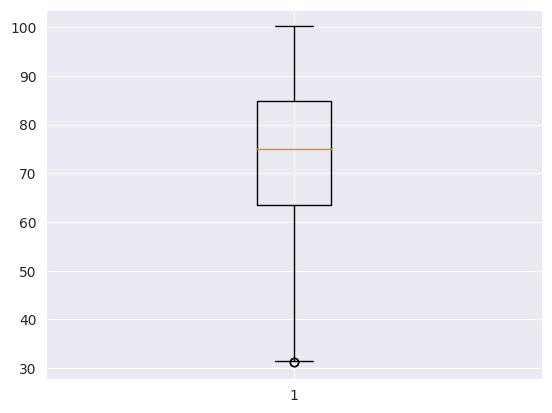

In [ ]:
data_box=ep_cleaned1.dropna()# data set is: data_box
data1_box=data_box.r_humidity
box2=plt.boxplot(data1_box)
plt.show()

In [ ]:
[item.get_ydata() for item in box2['fliers']]

[array([31.29, 31.15])]

In [ ]:
#data_cleaned1.drop(data_cleaned1.index[data_cleaned1['r_humidity']<31], inplace=True)
ep_cleaned1.drop(ep_cleaned1[ep_cleaned1['r_humidity'] == 31.29].index, inplace = True)
ep_cleaned1.drop(ep_cleaned1[ep_cleaned1['r_humidity'] == 31.15].index, inplace = True)

<ipython-input-49-9c79c9df3ce7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-49-9c79c9df3ce7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



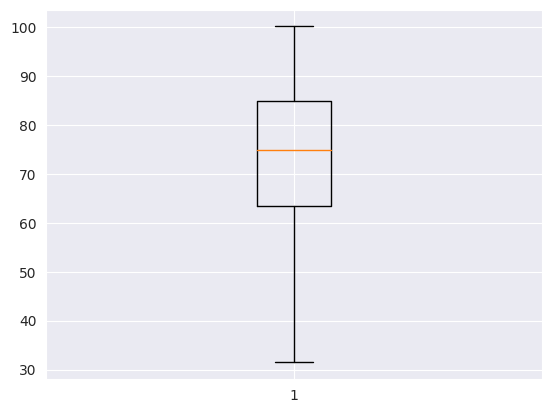

In [ ]:
data_box=ep_cleaned1.dropna()
data1_box=data_box.r_humidity
box2=plt.boxplot(data1_box)
plt.show()

All the outliers have been treated .

In [ ]:
ep_cleaned1

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0            9.59           38.56       1017.01       60.10             481.30
1           12.04           42.34       1019.72       94.67             465.36
2           13.87           45.08       1024.42       81.69             465.48
3           13.72           54.30       1017.89       79.08             467.05
4           15.14           49.64       1023.78       75.00             463.58
...           ...             ...           ...         ...                ...
9563        17.10           49.69       1005.53       81.82             457.32
9564        24.73           65.34       1015.42       52.80             446.92
9565        30.44           56.24       1005.19       56.24             429.34
9566        23.00           66.05       1020.61       80.29             421.57
9567        17.75           49.25       1020.86       63.67             454.41

[9517 rows x 5 columns]

*   In the original dataset we had **9568 rows**
*   After removing 41 duplicates we were left with **9527 rows**
*   After imputation of outliers with medain and removing some outliers we are left with **9517 rows**

#Correlation analysis

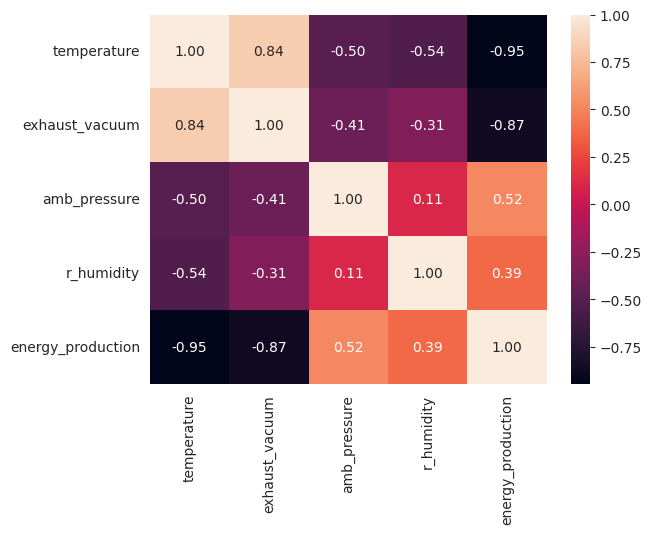

In [ ]:
correlation_matrix = ep_cleaned1.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

In [ ]:
ep_cleaned1.corr()


temperature  exhaust_vacuum  amb_pressure  r_humidity  \
temperature           1.000000        0.843591     -0.503895   -0.541903   
exhaust_vacuum        0.843591        1.000000     -0.414369   -0.311147   
amb_pressure         -0.503895       -0.414369      1.000000    0.106891   
r_humidity           -0.541903       -0.311147      0.106891    1.000000   
energy_production    -0.947896       -0.869786      0.516769    0.389840   

                   energy_production  
temperature                -0.947896  
exhaust_vacuum             -0.869786  
amb_pressure                0.516769  
r_humidity                  0.389840  
energy_production           1.000000

*   From correlation matrix and heatmap we can observe that their is strong negative corelation of temperature and exhaust_vacuum with the energy_production.
*    The amb_pressure and r_humidity have moderate corelation with the energy_production

In [ ]:
import statsmodels.formula.api as smf
model=smf.ols("energy_production~temperature+exhaust_vacuum+amb_pressure+r_humidity",data=ep_cleaned1).fit()
model.params

Intercept         439.655116
temperature        -1.963708
exhaust_vacuum     -0.237729
amb_pressure        0.076625
r_humidity         -0.155842
dtype: float64

In [ ]:
print(model.pvalues,'\n',model.tvalues)

Intercept          0.000000e+00
temperature        0.000000e+00
exhaust_vacuum    5.999810e-221
amb_pressure       1.050867e-14
r_humidity        1.576160e-283
dtype: float64 
 Intercept          43.174651
temperature      -129.056781
exhaust_vacuum    -32.589287
amb_pressure        7.745319
r_humidity        -37.243333
dtype: float64


In [ ]:
print(model.rsquared,model.rsquared_adj)

0.9283554892359834 0.9283253611826765


In [ ]:
ml_t=smf.ols("energy_production~temperature",data=ep_cleaned1).fit()
print(ml_t.pvalues,ml_t.tvalues)

Intercept      0.0
temperature    0.0
dtype: float64 Intercept      3161.310890
temperature    -290.232853
dtype: float64


In [ ]:
ml_t.rsquared,ml_t.rsquared_adj

(0.8985067846821612, 0.8984961180278976)

In [ ]:
ml_v=smf.ols("energy_production~exhaust_vacuum",data=ep_cleaned1).fit()
print(ml_v.pvalues,ml_v.tvalues)

Intercept         0.0
exhaust_vacuum    0.0
dtype: float64 Intercept         1366.654574
exhaust_vacuum    -171.945821
dtype: float64


In [ ]:
(ml_v.rsquared,ml_v.rsquared_adj)

(0.7565273537538593, 0.7565017654568287)

In [ ]:
ml_TV=smf.ols("energy_production~temperature+exhaust_vacuum",data=ep_cleaned1).fit()
print(ml_TV.pvalues,ml_TV.tvalues)

Intercept         0.0
temperature       0.0
exhaust_vacuum    0.0
dtype: float64 Intercept         2096.147418
temperature       -133.874849
exhaust_vacuum     -43.852934
dtype: float64


In [ ]:
ml_TV.rsquared,ml_TV.rsquared_adj

(0.9155722907932466, 0.9155545426937708)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 3.081e+04
Date:                Mon, 08 Apr 2024   Prob (F-statistic):               0.00
Time:                        06:59:40   Log-Likelihood:                -27945.
No. Observations:                9517   AIC:                         5.590e+04
Df Residuals:                    9512   BIC:                         5.594e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        439.6551     10.183     43.175      0.000     419.694     459.616
temperature       -1.9637      0.015   -129.057      0.000      -1.994      -1.934
exhaust_vacuum    -0.2377      0.007    -32.589      0.000      -0.252      -0.223
amb_pressure       0.0766      0.010      7.745      0.000       0.057       0.096
r_humidity        -0.1558      0.004    -37.243      0.000      -0.164      -0.148
==============================================================================
Omnibus:                      887.663   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4061.408
Skew:                          -0.353   Prob(JB):                         0.00
Kurtosis:                       6.121   Cond. No.                     2.22e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

subset selection

In [ ]:
model1=smf.ols("energy_production~temperature+amb_pressure+r_humidity",data=ep_cleaned1).fit()
print(model1.rsquared,model1.rsquared_adj)

0.9203560271245248 0.920330910766002


In [ ]:
model2=smf.ols("energy_production~exhaust_vacuum+amb_pressure+r_humidity",data=ep_cleaned1).fit()
print(model2.rsquared,model2.rsquared_adj)

0.8029048913966353 0.8028427358909263


Statsmodel gives accuracy of 92%

#Splitting data into X and Y

In [ ]:
ep_cleaned1.head()

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0         9.59           38.56       1017.01       60.10             481.30
1        12.04           42.34       1019.72       94.67             465.36
2        13.87           45.08       1024.42       81.69             465.48
3        13.72           54.30       1017.89       79.08             467.05
4        15.14           49.64       1023.78       75.00             463.58

In [ ]:
X=ep_cleaned1.iloc[:,0:4]
Y=ep_cleaned1.iloc[:,4]

In [ ]:
X

temperature  exhaust_vacuum  amb_pressure  r_humidity
0            9.59           38.56       1017.01       60.10
1           12.04           42.34       1019.72       94.67
2           13.87           45.08       1024.42       81.69
3           13.72           54.30       1017.89       79.08
4           15.14           49.64       1023.78       75.00
...           ...             ...           ...         ...
9563        17.10           49.69       1005.53       81.82
9564        24.73           65.34       1015.42       52.80
9565        30.44           56.24       1005.19       56.24
9566        23.00           66.05       1020.61       80.29
9567        17.75           49.25       1020.86       63.67

[9517 rows x 4 columns]

In [ ]:
Y

0       481.30
1       465.36
2       465.48
3       467.05
4       463.58
         ...  
9563    457.32
9564    446.92
9565    429.34
9566    421.57
9567    454.41
Name: energy_production, Length: 9517, dtype: float64

#Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(X)
X

array([[-1.35377459, -1.24105891,  0.69003638, -0.91627773],
       [-1.02452801, -0.94308195,  1.16947838,  1.46600721],
       [-0.77860098, -0.72708808,  2.00098294,  0.57153054],
       ...,
       [ 1.44818097,  0.1526534 , -1.40110915, -1.18227773],
       [ 0.44834647,  0.92597454,  1.3269335 ,  0.47505386],
       [-0.25718191, -0.39836747,  1.37116246, -0.67026219]])

In [ ]:

from sklearn.model_selection import train_test_split,KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score


#Splitting data into train test part

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape

(7613, 4)

In [ ]:
X_test.shape

(1904, 4)

#Model Building

#1.LinearRegression

In [ ]:
reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [ ]:
kfold1=KFold(n_splits=10)
results=cross_val_score(reg,X,Y,cv=kfold1)

In [ ]:
results.mean()

0.928076148733374

In [ ]:
#for predict the test values
y_predict_li=reg.predict(X_test)
y_predict_li

array([478.83307415, 432.70381229, 447.9007764 , ..., 437.62008203,
       455.935437  , 464.2378721 ])

In [ ]:
#testing accuracy
test_data_model_score=reg.score(X_test,Y_test)
print('Accuracy of test data:',test_data_model_score)

#training Accuracy
train_data_model_score=reg.score(X_train,Y_train)
print('Accuracy of train data:',train_data_model_score)

Accuracy of test data: 0.9292894568301266
Accuracy of train data: 0.9280801404920015


In [ ]:
# Mean Absolute Error (MAE)
mae1 = mean_absolute_error(Y_test,y_predict_li)
print(f"Mean Absolute Error (MAE): {mae1}")

# Mean Squared Error (MSE)
mse1 = mean_squared_error(Y_test, y_predict_li)
print(f"Mean Squared Error (MSE): {mse1}")

# Root Mean Squared Error (RMSE)
rmse1 = np.sqrt(mse1)
print(f"Root Mean Squared Error (RMSE): {rmse1}")

# Root Mean Squared Logarithmic Error (RMSLE)
rmsle1= np.sqrt(mean_squared_log_error(1 + Y_test, 1 + y_predict_li))
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle1}")

# R-squared (Coefficient of Determination)
r_squared1 = r2_score(Y_test,y_predict_li)
print(f"R-squared (R^2): {r_squared1}")

Mean Absolute Error (MAE): 3.6263928825558427
Mean Squared Error (MSE): 20.655250174669366
Root Mean Squared Error (RMSE): 4.544804745494504
Root Mean Squared Logarithmic Error (RMSLE): 0.010014906594799054
R-squared (R^2): 0.9292894568301266


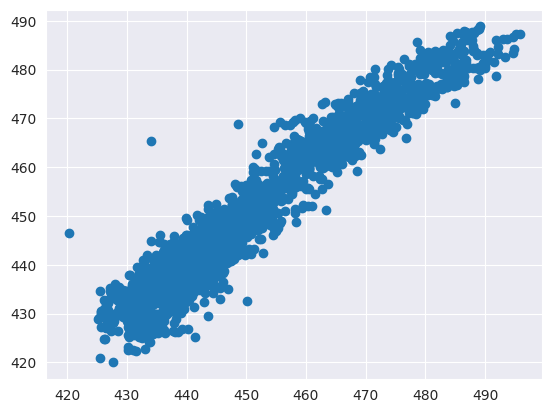

In [ ]:
#plot on prediction
plt.scatter(Y_test,y_predict_li)
plt.show()

(416.4924009953151, 499.89011605214307, 416.4924009953151, 499.89011605214307)

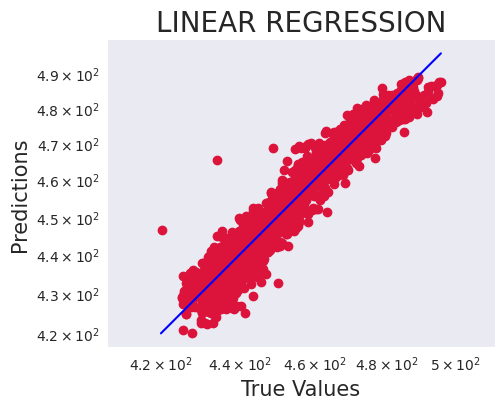

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(Y_test, y_predict_li, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_li), max(Y_test))
p2 = min(min(y_predict_li), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('LINEAR REGRESSION',fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

#2.Lasso Regression (L1 Regularization)

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,Y_train)

Lasso(alpha=0.1)

In [ ]:
kfold1=KFold(n_splits=10)
results=cross_val_score(lasso,X,Y,cv=kfold1)

In [ ]:
results.mean()

0.9279247550257297

In [ ]:
#for predict the test values
y_predict_lasso=lasso.predict(X_test)
y_predict_lasso

array([478.56920963, 432.93101179, 447.95813207, ..., 437.90931915,
       456.0228011 , 464.13427412])

In [ ]:
#testing score
test_data_model_score=lasso.score(X_test,Y_test)
print ('Accuracy of test data',round(test_data_model_score,4))

train_data_model_score=lasso.score(X_train,Y_train)
print ('Accuracy of train data',round(train_data_model_score,4))

Accuracy of test data 0.9293
Accuracy of train data 0.9279


In [ ]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test,y_predict_lasso)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(Y_test,y_predict_lasso)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Root Mean Squared Logarithmic Error (RMSLE)
rmsle = np.sqrt(mean_squared_log_error(1 + Y_test, 1 + y_predict_lasso))
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle}")

# R-squared (Coefficient of Determination)
r_squared = r2_score(Y_test,y_predict_lasso)
print(f"R-squared (R^2): {r_squared}")

Mean Absolute Error (MAE): 3.625259522919913
Mean Squared Error (MSE): 20.660228727881464
Root Mean Squared Error (RMSE): 4.545352431647238
Root Mean Squared Logarithmic Error (RMSLE): 0.010012135197683531
R-squared (R^2): 0.9292724134053871


In [ ]:
from sklearn.model_selection import GridSearchCV
# Define hyperparameters and their possible values for grid search
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}

# Create GridSearchCV object
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_lasso_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_test = best_lasso_model.predict(X_test)

# Evaluate the best model on the test set
mse_test = mean_squared_error(Y_test, y_pred_test)

print(f'Best Lasso Hyperparameters: {best_params}')
print(f'Mean Squared Error (Test Set): {mse_test}')

Best Lasso Hyperparameters: {'alpha': 0.001}
Mean Squared Error (Test Set): 20.654912662481006


In [ ]:
cross_val_scores = cross_val_score(best_lasso_model, X_train, Y_train, cv=5)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

Y_pred_test = best_lasso_model.predict(X_test)
test_mse = mean_squared_error(Y_test, Y_pred_test)
test_r2 = r2_score(Y_test, Y_pred_test)

print(f'Test Mean Squared Error: {test_mse}')
print(f'Test R-squared: {test_r2}')

Test Mean Squared Error: 20.654912662481006
Test R-squared: 0.92929061225889


In [ ]:
# Mean Absolute Error (MAE)
mae2 = mean_absolute_error(Y_test,Y_pred_test)
print(f"Mean Absolute Error (MAE): {mae2}")

# Mean Squared Error (MSE)
mse2 = mean_squared_error(Y_test, Y_pred_test)
print(f"Mean Squared Error (MSE): {mse2}")

# Root Mean Squared Error (RMSE)
rmse2 = np.sqrt(mse2)
print(f"Root Mean Squared Error (RMSE): {rmse2}")

# Root Mean Squared Logarithmic Error (RMSLE)
rmsle2 = np.sqrt(mean_squared_log_error(1 + Y_test, 1 + Y_pred_test))
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle2}")

# R-squared (Coefficient of Determination)
r_squared2 = r2_score(Y_test,Y_pred_test)
print(f"R-squared (R^2): {r_squared2}")

Mean Absolute Error (MAE): 3.626290667385287
Mean Squared Error (MSE): 20.654912662481006
Root Mean Squared Error (RMSE): 4.544767613693907
Root Mean Squared Logarithmic Error (RMSLE): 0.01001486770255261
R-squared (R^2): 0.92929061225889


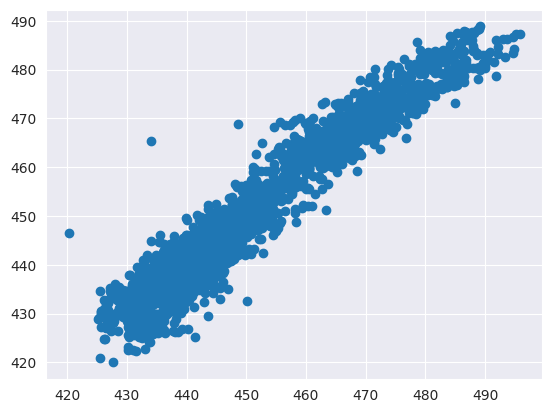

In [ ]:
#plot on prdtion
plt.scatter(Y_test, Y_pred_test)
plt.show()

(416.49103462612976,
 499.89019414601916,
 416.49103462612976,
 499.89019414601916)

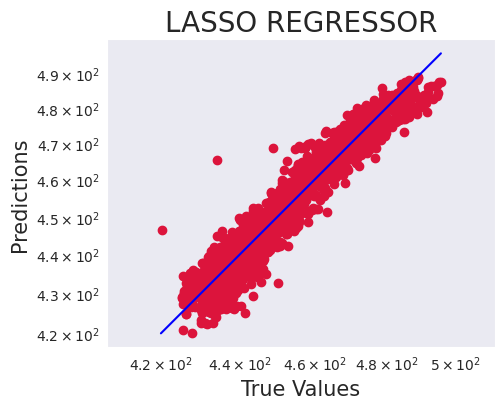

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(Y_test, Y_pred_test, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred_test), max(Y_test))
p2 = min(min(Y_pred_test), min(Y_test))
plt.title('LASSO REGRESSOR',fontsize=20)
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

#3.Ridge Regression (L2 Regularization)

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, Y_train)

Ridge()

In [ ]:
kfold=KFold(n_splits=10)
results=cross_val_score(ridge,X,Y,cv=kfold)

In [ ]:
results.mean()

0.9280761531331206

In [ ]:
#for predict the test values
y_predict_ridge=ridge.predict(X_test)
y_predict_ridge

array([478.83015417, 432.70414703, 447.90130041, ..., 437.62110083,
       455.92986452, 464.2413471 ])

In [ ]:
#testing score
test_data_model_score=ridge.score(X_test,Y_test)
print ('Accuracy of test data',round(test_data_model_score,4))

train_data_model_score=ridge.score(X_train,Y_train)
print ('Accuracy of train data',round(train_data_model_score,4))

Accuracy of test data 0.9293
Accuracy of train data 0.9281


In [ ]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test,y_predict_ridge)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, y_predict_ridge)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Root Mean Squared Logarithmic Error (RMSLE)
rmsle = np.sqrt(mean_squared_log_error(1 + Y_test, 1 + y_predict_ridge))
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle}")

# R-squared (Coefficient of Determination)
r_squared = r2_score(Y_test,y_predict_ridge)
print(f"R-squared (R^2): {r_squared}")

Mean Absolute Error (MAE): 3.6264927102773052
Mean Squared Error (MSE): 20.655175134903548
Root Mean Squared Error (RMSE): 4.544796489932585
Root Mean Squared Logarithmic Error (RMSLE): 0.010014734050146244
R-squared (R^2): 0.9292897137189349


In [ ]:
# Define hyperparameters and their possible values for grid search
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}

# Create GridSearchCV object
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_ridge_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_test = best_ridge_model.predict(X_test)

# Evaluate the best model on the test set
mse_test = mean_squared_error(Y_test, y_pred_test)

print(f'Best Ridge Hyperparameters: {best_params}')
print(f'Mean Squared Error (Test Set): {mse_test}')

Best Ridge Hyperparameters: {'alpha': 0.001}
Mean Squared Error (Test Set): 20.655250082456597


In [ ]:
cross_val_scores = cross_val_score(best_ridge_model, X_train,Y_train,cv=5)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

Y_pred_test = best_ridge_model.predict(X_test)
test_mse = mean_squared_error(Y_test, Y_pred_test)
test_r2 = r2_score(Y_test, Y_pred_test)

print(f'Test Mean Squared Error: {test_mse}')
print(f'Test R-squared: {test_r2}')

Test Mean Squared Error: 20.655250082456597
Test R-squared: 0.929289457145805


In [ ]:
# Mean Absolute Error (MAE)
mae3 = mean_absolute_error(Y_test,Y_pred_test)
print(f"Mean Absolute Error (MAE): {mae3}")

# Mean Squared Error (MSE)
mse3 = mean_squared_error(Y_test, Y_pred_test)
print(f"Mean Squared Error (MSE): {mse3}")

# Root Mean Squared Error (RMSE)
rmse3 = np.sqrt(mse3)
print(f"Root Mean Squared Error (RMSE): {rmse3}")

# Root Mean Squared Logarithmic Error (RMSLE)
rmsle3 = np.sqrt(mean_squared_log_error(1 + Y_test, 1 + Y_pred_test))
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle3}")

# R-squared (Coefficient of Determination)
r_squared3= r2_score(Y_test,Y_pred_test)
print(f"R-squared (R^2): {r_squared3}")

Mean Absolute Error (MAE): 3.6263929825221264
Mean Squared Error (MSE): 20.655250082456597
Root Mean Squared Error (RMSE): 4.54480473534965
Root Mean Squared Logarithmic Error (RMSLE): 0.010014906418093933
R-squared (R^2): 0.929289457145805


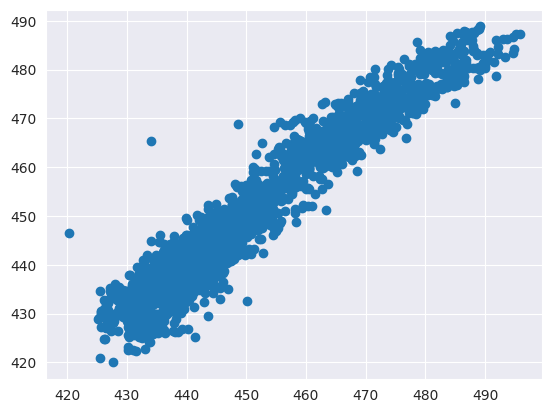

In [ ]:
#plot on prdtion
plt.scatter(Y_test, Y_pred_test)
plt.show()

(416.4924135985719, 499.890115331814, 416.4924135985719, 499.890115331814)

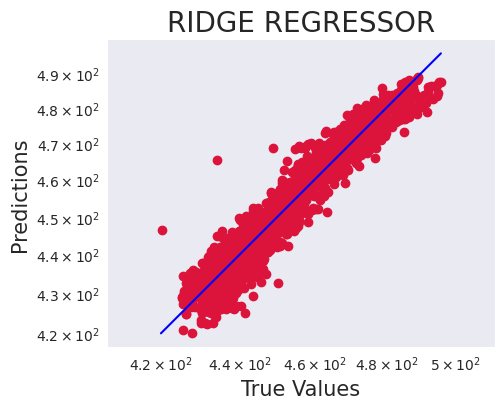

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(Y_test, Y_pred_test, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred_test), max(Y_test))
p2 = min(min(Y_pred_test), min(Y_test))
plt.title('RIDGE REGRESSOR',fontsize=20)
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

#4.Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net_model=ElasticNet(alpha=1.0,l1_ratio=0.5)
elastic_net_model.fit(X_train,Y_train)

ElasticNet()

In [ ]:
kfold1=KFold(n_splits=10)
results=cross_val_score(elastic_net_model,X,Y,cv=kfold1)

In [ ]:
results.mean()

0.859105610349757

In [ ]:
#for predict the test values
y_predict_elasticnet=elastic_net_model.predict(X_test)
y_predict_elasticnet

array([473.15288756, 437.05825536, 449.88478554, ..., 441.74756562,
       453.76908577, 464.34522306])

In [ ]:
#testing score
test_data_model_score=elastic_net_model.score(X_test,Y_test)
print ('Accuracy of test data',round(test_data_model_score,4))

train_data_model_score=elastic_net_model.score(X_train,Y_train)
print ('Accuracy of train data',round(train_data_model_score,4))

Accuracy of test data 0.8625
Accuracy of train data 0.8587


In [ ]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test,y_predict_elasticnet)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, y_predict_elasticnet)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Root Mean Squared Logarithmic Error (RMSLE)
rmsle = np.sqrt(mean_squared_log_error(1 + Y_test, 1 + y_predict_elasticnet))
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle}")

# R-squared (Coefficient of Determination)
r_squared = r2_score(Y_test,y_predict_elasticnet)
print(f"R-squared (R^2): {r_squared}")

Mean Absolute Error (MAE): 5.065348685815918
Mean Squared Error (MSE): 40.179351081510816
Root Mean Squared Error (RMSE): 6.338718410018765
Root Mean Squared Logarithmic Error (RMSLE): 0.013725209727678803
R-squared (R^2): 0.8624512550000065


In [ ]:
# Define hyperparameters and their possible values for grid search
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

# Create GridSearchCV object
grid_search = GridSearchCV(elastic_net_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_elasticnet_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_test = best_elasticnet_model.predict(X_test)

# Evaluate the best model on the test set
mse_test = mean_squared_error(Y_test, y_pred_test)

print(f'Best Elastic Net Hyperparameters: {best_params}')
print(f'Mean Squared Error (Test Set): {mse_test}')

Best Elastic Net Hyperparameters: {'alpha': 0.001, 'l1_ratio': 0.9}
Mean Squared Error (Test Set): 20.65488943765085


In [ ]:

cross_val_scores = cross_val_score(best_elasticnet_model, X_train, Y_train, cv=5)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

Y_pred_test = best_elasticnet_model.predict(X_test)
test_mse = mean_squared_error(Y_test, Y_pred_test)
test_r2 = r2_score(Y_test, Y_pred_test)

print(f'Test Mean Squared Error: {test_mse}')
print(f'Test R-squared: {test_r2}')


Test Mean Squared Error: 20.65488943765085
Test R-squared: 0.9292906917660536


In [ ]:
# Mean Absolute Error (MAE)
mae4 = mean_absolute_error(Y_test,Y_pred_test)
print(f"Mean Absolute Error (MAE): {mae4}")

# Mean Squared Error (MSE)
mse4 = mean_squared_error(Y_test, Y_pred_test)
print(f"Mean Squared Error (MSE): {mse4}")

# Root Mean Squared Error (RMSE)
rmse4 = np.sqrt(mse4)
print(f"Root Mean Squared Error (RMSE): {rmse4}")

# Root Mean Squared Logarithmic Error (RMSLE)
rmsle4 = np.sqrt(mean_squared_log_error(1 + Y_test, 1 + Y_pred_test))
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle4}")

# R-squared (Coefficient of Determination)
r_squared4 = r2_score(Y_test,Y_pred_test)
print(f"R-squared (R^2): {r_squared4}")

Mean Absolute Error (MAE): 3.626371755466139
Mean Squared Error (MSE): 20.65488943765085
Root Mean Squared Error (RMSE): 4.544765058575729
Root Mean Squared Logarithmic Error (RMSLE): 0.010014748235636577
R-squared (R^2): 0.9292906917660536


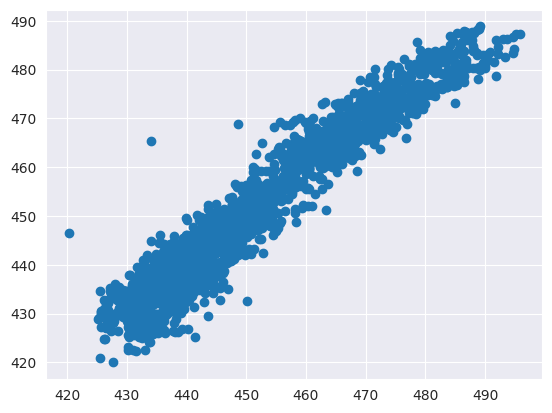

In [ ]:
#plot on prdtion
plt.scatter(Y_test, Y_pred_test)
plt.show()

(416.5001556661832, 499.8896728444329, 416.5001556661832, 499.8896728444329)

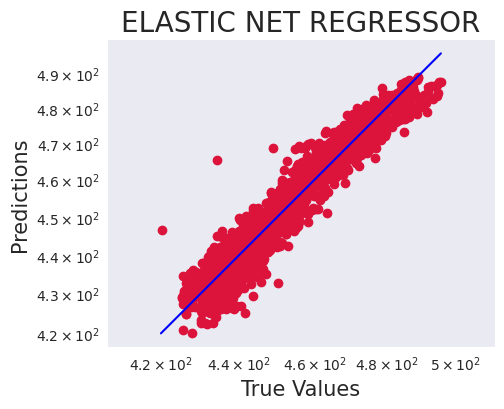

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(Y_test, Y_pred_test, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred_test), max(Y_test))
p2 = min(min(Y_pred_test), min(Y_test))
plt.title('ELASTIC NET REGRESSOR',fontsize=20)
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

#5.XGBoost

In [ ]:
import xgboost as xgb
XGB=xgb.XGBRegressor(n_estimators=100,eta=0.001,gamma=10,learning_rate=0.5)
XGB.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.001, eval_metric=None,
             feature_types=None, gamma=10, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.5, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
kfold2=KFold(n_splits=10)
results=cross_val_score(XGB,X,Y,cv=kfold2)

In [ ]:
results.mean()

0.9582777417994572

In [ ]:
#for predict the test values
y_predict_xgb=XGB.predict(X_test)
y_predict_xgb

array([477.97473, 431.16934, 450.20422, ..., 440.5422 , 453.0514 ,
       462.03812], dtype=float32)

In [ ]:
#testing score
test_data_model_score=XGB.score(X_test,Y_test)
print ('Accuracy of test data',round(test_data_model_score,4))

train_data_model_score=XGB.score(X_train,Y_train)
print ('Accuracy of train data',round(train_data_model_score,4))

Accuracy of test data 0.9616
Accuracy of train data 0.975


In [ ]:

# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test,y_predict_xgb)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, y_predict_xgb)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Root Mean Squared Logarithmic Error (RMSLE)
rmsle = np.sqrt(mean_squared_log_error(1 + Y_test, 1 + y_predict_xgb))
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle}")

# R-squared (Coefficient of Determination)
r_squared = r2_score(Y_test,y_predict_xgb)
print(f"R-squared (R^2): {r_squared}")

Mean Absolute Error (MAE): 2.504141092380556
Mean Squared Error (MSE): 11.206696680046997
Root Mean Squared Error (RMSE): 3.3476404645730695
Root Mean Squared Logarithmic Error (RMSLE): 0.00736128363199951
R-squared (R^2): 0.961635341974316


In [ ]:
# Define the hyperparameters and their possible values for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(XGB, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

# Evaluate the best model on the test set
Y_pred_test = best_xgb_model.predict(X_test)
test_mse = mean_squared_error(Y_test, Y_pred_test)

print(f'Best Hyperparameters: {best_params}')
print(f'Test Mean Squared Error: {test_mse}')


Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Test Mean Squared Error: 9.291882667809695


In [ ]:
cross_val_scores = cross_val_score(best_xgb_model, X_train, Y_train, cv=5)

In [ ]:

Y_pred_test = best_xgb_model.predict(X_test)
test_mse = mean_squared_error(Y_test, Y_pred_test)
test_r2 = r2_score(Y_test, Y_pred_test)

print(f'Test Mean Squared Error: {test_mse}')
print(f'Test R-squared: {test_r2}')

Test Mean Squared Error: 9.291882667809695
Test R-squared: 0.9681904569077885


In [ ]:
# Mean Absolute Error (MAE)
mae5 = mean_absolute_error(Y_test,Y_pred_test)
print(f"Mean Absolute Error (MAE): {mae5}")

# Mean Squared Error (MSE)
mse5 = mean_squared_error(Y_test, Y_pred_test)
print(f"Mean Squared Error (MSE): {mse5}")

# Root Mean Squared Error (RMSE)
rmse5 = np.sqrt(mse5)
print(f"Root Mean Squared Error (RMSE): {rmse5}")

# Root Mean Squared Logarithmic Error (RMSLE)
rmsle5 = np.sqrt(mean_squared_log_error(1 + Y_test, 1 + Y_pred_test))
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle5}")

# R-squared (Coefficient of Determination)
r_squared5 = r2_score(Y_test,Y_pred_test)
print(f"R-squared (R^2): {r_squared5}")

Mean Absolute Error (MAE): 2.2424525426015136
Mean Squared Error (MSE): 9.291882667809695
Root Mean Squared Error (RMSE): 3.048258956816119
Root Mean Squared Logarithmic Error (RMSLE): 0.006699277080526188
R-squared (R^2): 0.9681904569077885


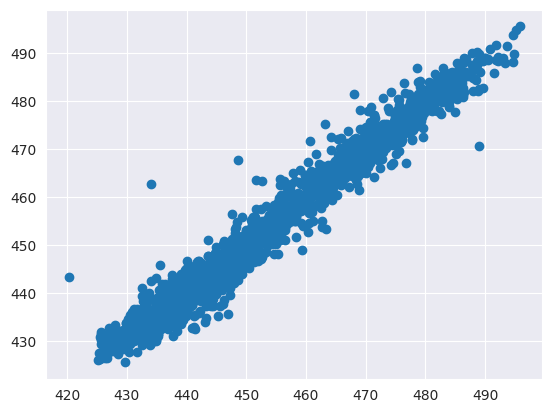

In [ ]:
#plot on prdtion
plt.scatter(Y_test, Y_pred_test)
plt.show()

(416.802566813165, 499.8723956836705, 416.802566813165, 499.8723956836705)

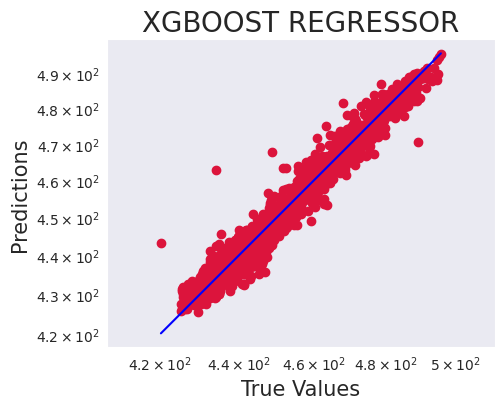

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(Y_test, Y_pred_test, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred_test), max(Y_test))
p2 = min(min(Y_pred_test), min(Y_test))
plt.title('XGBOOST REGRESSOR',fontsize=20)
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

# 6.Ada Boost

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(random_state = 0)
DTR.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
AB = AdaBoostRegressor(base_estimator=DTR,n_estimators=100)
AB.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=0),
                  n_estimators=100)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, p=2) # k =5 # p=2 --> Eucledian distance
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [ ]:
#for predict the test values
y_predict_ab=knn.predict(X_test)
y_predict_ab

array([484.064, 432.952, 448.726, ..., 440.82 , 454.04 , 459.97 ])

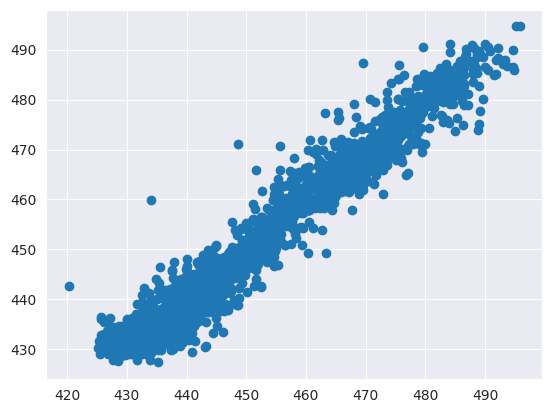

In [ ]:
#plot on prdtion
plt.scatter(Y_test, y_predict_ab)
plt.show()

(416.802566813165, 499.8723956836705, 416.802566813165, 499.8723956836705)

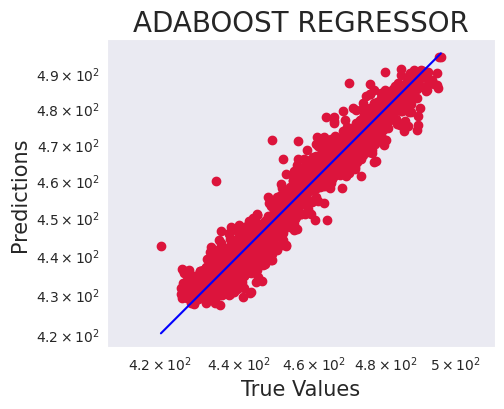

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(Y_test, y_predict_ab, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_ab), max(Y_test))
p2 = min(min(y_predict_ab), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('ADABOOST REGRESSOR',fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

In [ ]:
#testing score
test_data_model_score=AB.score(X_test,Y_test)
print ('Accuracy of test data',round(test_data_model_score,4))


train_data_model_score=AB.score(X_train,Y_train)
print ('Accuracy of test data',round(train_data_model_score,4))

Accuracy of test data 0.9664
Accuracy of test data 0.9999


In [ ]:
# Mean Absolute Error (MAE)
mae6 = mean_absolute_error(Y_test,y_predict_ab)
print(f"Mean Absolute Error (MAE): {mae6}")

# Mean Squared Error (MSE)
mse6 = mean_squared_error(Y_test, y_predict_ab)
print(f"Mean Squared Error (MSE): {mse6}")

# Root Mean Squared Error (RMSE)
rmse6 = np.sqrt(mse6)
print(f"Root Mean Squared Error (RMSE): {rmse6}")

# Root Mean Squared Logarithmic Error (RMSLE)
rmsle6 = np.sqrt(mean_squared_log_error(1 + Y_test, 1 + y_predict_ab))
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle6}")

# R-squared (Coefficient of Determination)
r_squared6= r2_score(Y_test,y_predict_ab)
print(f"R-squared (R^2): {r_squared6}")

Mean Absolute Error (MAE): 2.785664915966386
Mean Squared Error (MSE): 14.549015968487387
Root Mean Squared Error (RMSE): 3.814317234904222
Root Mean Squared Logarithmic Error (RMSLE): 0.00836142351535058
R-squared (R^2): 0.9501933497285577


#7.Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(n_estimators=100,
                             learning_rate=0.1,
                             max_depth=3,random_state=42)
gb.fit(X_train,Y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
kfold1=KFold(n_splits=10)
results=cross_val_score(gb,X,Y,cv=kfold1)

In [ ]:
results.mean()

0.9475913864514425

In [ ]:
#for predict the test values
y_predict_gb=gb.predict(X_test)
y_predict_gb

array([479.97476512, 432.1175146 , 448.37185312, ..., 434.6541396 ,
       454.87487254, 463.08071466])

In [ ]:
#testing score
test_data_model_score=gb.score(X_test,Y_test)
print ('Accuracy of test data',round(test_data_model_score,4))

train_data_model_score=gb.score(X_train,Y_train)
print ('Accuracy of train data',round(train_data_model_score,4))

Accuracy of test data 0.9501
Accuracy of train data 0.9528


In [ ]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test,y_predict_gb)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, y_predict_gb)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Root Mean Squared Logarithmic Error (RMSLE)
rmsle = np.sqrt(mean_squared_log_error(1 + Y_test, 1 + y_predict_gb))
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle}")

# R-squared (Coefficient of Determination)
r_squared = r2_score(Y_test,y_predict_gb)
print(f"R-squared (R^2): {r_squared}")

Mean Absolute Error (MAE): 2.972475633186595
Mean Squared Error (MSE): 14.588941107582615
Root Mean Squared Error (RMSE): 3.8195472385588602
Root Mean Squared Logarithmic Error (RMSLE): 0.008380358379547086
R-squared (R^2): 0.9500566712449914


In [ ]:
param_grid={
    'n_estimators':[50,100,150],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth':[3,5,7]
}
grid_search=GridSearchCV(estimator=gb,param_grid=param_grid,scoring='neg_mean_squared_error',cv=5)
grid_search.fit(X_train,Y_train)

best_params=grid_search.best_params_
print('Best Hyperparameters:', best_params)

# Evaluate the model with the best hyperparameters on the test set
best_gb_model = grid_search.best_estimator_
y_pred = best_gb_model.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150}
Mean Squared Error on Test Set: 8.991693448415


In [ ]:

cross_val_scores = cross_val_score(best_gb_model, X_train, Y_train, cv=5)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

Y_pred_test = best_gb_model.predict(X_test)
test_mse = mean_squared_error(Y_test, Y_pred_test)
test_r2 = r2_score(Y_test, Y_pred_test)

print(f'Test Mean Squared Error: {test_mse}')
print(f'Test R-squared: {test_r2}')


Test Mean Squared Error: 8.991693448415
Test R-squared: 0.9692181153761023


In [ ]:
# Mean Absolute Error (MAE)
mae7 = mean_absolute_error(Y_test,Y_pred_test)
print(f"Mean Absolute Error (MAE): {mae7}")

# Mean Squared Error (MSE)
mse7 = mean_squared_error(Y_test, Y_pred_test)
print(f"Mean Squared Error (MSE): {mse7}")

# Root Mean Squared Error (RMSE)
rmse7 = np.sqrt(mse7)
print(f"Root Mean Squared Error (RMSE): {rmse7}")

# Root Mean Squared Logarithmic Error (RMSLE)
rmsle7 = np.sqrt(mean_squared_log_error(1 + Y_test, 1 + Y_pred_test))
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle7}")

# R-squared (Coefficient of Determination)
r_squared7 = r2_score(Y_test,Y_pred_test)
print(f"R-squared (R^2): {r_squared7}")

Mean Absolute Error (MAE): 2.1773742568046415
Mean Squared Error (MSE): 8.991693448415
Root Mean Squared Error (RMSE): 2.99861525514945
Root Mean Squared Logarithmic Error (RMSLE): 0.0065882814908954195
R-squared (R^2): 0.9692181153761023


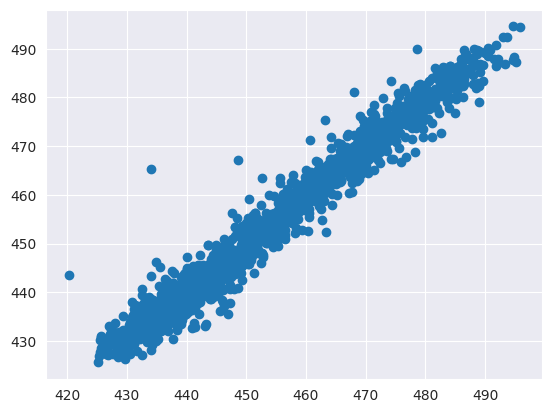

In [ ]:
#plot on prdtion
plt.scatter(Y_test, Y_pred_test)
plt.show()

(416.802566813165, 499.8723956836705, 416.802566813165, 499.8723956836705)

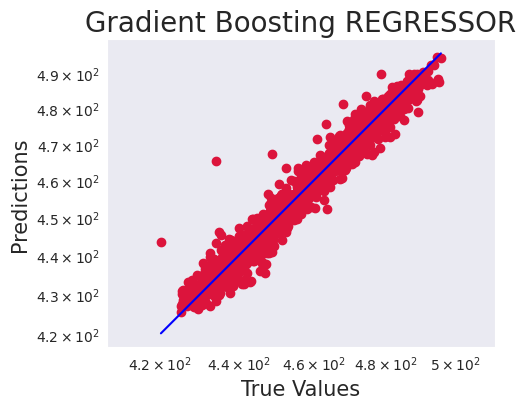

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(Y_test, Y_pred_test, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred_test), max(Y_test))
p2 = min(min(Y_pred_test), min(Y_test))
plt.title('Gradient Boosting REGRESSOR',fontsize=20)
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

#8.KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, p=2)
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [ ]:
kfold1=KFold(n_splits=10)
results=cross_val_score(knn,X,Y,cv=kfold1)

In [ ]:
results.mean()

0.9509496472854446

In [ ]:
#for predict the test values
y_predict_knn=knn.predict(X_test)
y_predict_knn

array([484.064, 432.952, 448.726, ..., 440.82 , 454.04 , 459.97 ])

In [ ]:
#testing score
test_data_model_score=knn.score(X_test,Y_test)
print ('Accuracy of test data',round(test_data_model_score,4))

train_data_model_score=knn.score(X_train,Y_train)
print ('Accuracy of train data',round(train_data_model_score,4))


Accuracy of test data 0.9502
Accuracy of train data 0.9673


In [ ]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test,y_predict_knn)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, y_predict_knn)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Root Mean Squared Logarithmic Error (RMSLE)
rmsle = np.sqrt(mean_squared_log_error(1 + Y_test, 1 + y_predict_knn))
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle}")

# R-squared (Coefficient of Determination)
r_squared = r2_score(Y_test,y_predict_knn)
print(f"R-squared (R^2): {r_squared}")

Mean Absolute Error (MAE): 2.785664915966386
Mean Squared Error (MSE): 14.549015968487387
Root Mean Squared Error (RMSE): 3.814317234904222
Root Mean Squared Logarithmic Error (RMSLE): 0.00836142351535058
R-squared (R^2): 0.9501933497285577


In [ ]:
# Define the hyperparameters and their possible values for grid search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_knn_model = grid_search.best_estimator_

# Evaluate the best model on the test set
Y_pred_test = best_knn_model.predict(X_test)
test_mse = mean_squared_error(Y_test, Y_pred_test)

print(f'Best Hyperparameters: {best_params}')
print(f'Test Mean Squared Error: {test_mse}')


Best Hyperparameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Test Mean Squared Error: 12.735955395341817


In [ ]:
cross_val_scores = cross_val_score(best_knn_model, X_train, Y_train, cv=5)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

Y_pred_test = best_knn_model.predict(X_test)
test_mse = mean_squared_error(Y_test, Y_pred_test)
test_r2 = r2_score(Y_test, Y_pred_test)

print(f'Test Mean Squared Error: {test_mse}')
print(f'Test R-squared: {test_r2}')


Test Mean Squared Error: 12.735955395341817
Test R-squared: 0.9564001250928293


In [ ]:
# Mean Absolute Error (MAE)
mae8 = mean_absolute_error(Y_test,Y_pred_test)
print(f"Mean Absolute Error (MAE): {mae8}")

# Mean Squared Error (MSE)
mse8 = mean_squared_error(Y_test, Y_pred_test)
print(f"Mean Squared Error (MSE): {mse8}")

# Root Mean Squared Error (RMSE)
rmse8= np.sqrt(mse8)
print(f"Root Mean Squared Error (RMSE): {rmse8}")

# Root Mean Squared Logarithmic Error (RMSLE)
rmsle8 = np.sqrt(mean_squared_log_error(1 + Y_test, 1 + Y_pred_test))
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle8}")

# R-squared (Coefficient of Determination)
r_squared8 = r2_score(Y_test,Y_pred_test)
print(f"R-squared (R^2): {r_squared8}")

Mean Absolute Error (MAE): 2.5395030614045275
Mean Squared Error (MSE): 12.735955395341817
Root Mean Squared Error (RMSE): 3.5687470343724024
Root Mean Squared Logarithmic Error (RMSLE): 0.007823796971424695
R-squared (R^2): 0.9564001250928293


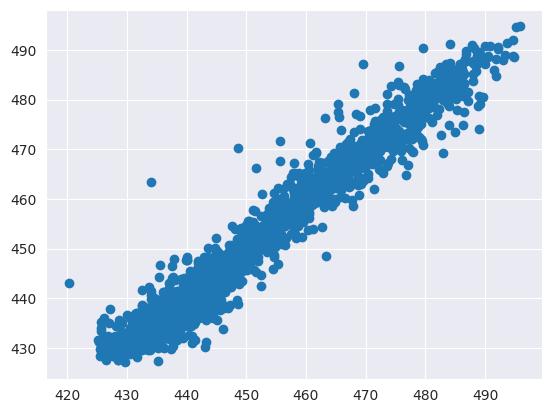

In [ ]:
#plot on prdtion
plt.scatter(Y_test, Y_pred_test)
plt.show()

(416.802566813165, 499.8723956836705, 416.802566813165, 499.8723956836705)

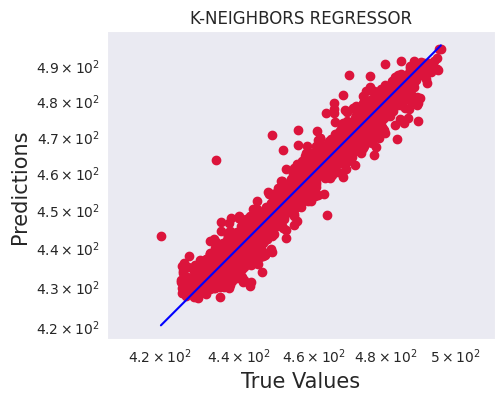

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(Y_test, Y_pred_test, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred_test), max(Y_test))
p2 = min(min(Y_pred_test), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('K-NEIGHBORS REGRESSOR')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

#9.Random forest model

In [ ]:
model1=RandomForestRegressor(n_estimators=100,random_state=0)
model1.fit(X_train,Y_train)


RandomForestRegressor(random_state=0)

In [ ]:
kfold=KFold(n_splits=10)
results=cross_val_score(model1,X,Y,cv=kfold)

In [ ]:
results.mean()

0.9625542765969254

In [ ]:
#Predicting on test data
preds1=model1.predict(X_test)
preds1

array([478.0303, 429.4054, 450.2847, ..., 439.7227, 454.0995, 460.9812])

In [ ]:
#Testing Accuracy
test_data_model_score=model1.score(X_test,Y_test)
print ('Accuracy of test data:',round(test_data_model_score,4))
#Training Accuracy
train_data_model_score=model1.score(X_train,Y_train)
print ('Accuracy of train data:',round(train_data_model_score,4))


Accuracy of test data: 0.9642
Accuracy of train data: 0.9945


In [ ]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, preds1)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, preds1)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Root Mean Squared Logarithmic Error (RMSLE)
rmsle = np.sqrt(mean_squared_log_error(1 + Y_test, 1 + preds1))
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle}")

# R-squared (Coefficient of Determination)
r_squared = r2_score(Y_test, preds1)
print(f"R-squared (R^2): {r_squared}")

Mean Absolute Error (MAE): 2.3471513130252033
Mean Squared Error (MSE): 10.448507245467455
Root Mean Squared Error (RMSE): 3.2324150793899373
Root Mean Squared Logarithmic Error (RMSLE): 0.007090234525159465
R-squared (R^2): 0.9642309041820556


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(model1, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model from the grid search for predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Evaluate the best model
mse_best_model = mean_squared_error(Y_test, predictions)
print("Mean Squared Error (Best Model):", mse_best_model)


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Mean Squared Error (Best Model): 10.399653781565531


In [ ]:
cross_val_scores = cross_val_score(best_model, X_train, Y_train, cv=5)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

Y_pred_test = best_model.predict(X_test)
test_mse = mean_squared_error(Y_test, Y_pred_test)
test_r2 = r2_score(Y_test, Y_pred_test)

print(f'Test Mean Squared Error: {test_mse}')
print(f'Test R-squared: {test_r2}')


Test Mean Squared Error: 10.399653781565531
Test R-squared: 0.9643981476160021


In [ ]:
# Mean Absolute Error (MAE)
mae9 = mean_absolute_error(Y_test, Y_pred_test)
print(f"Mean Absolute Error (MAE): {mae9}")

# Mean Squared Error (MSE)
mse9 = mean_squared_error(Y_test, Y_pred_test)
print(f"Mean Squared Error (MSE): {mse9}")

# Root Mean Squared Error (RMSE)
rmse9 = np.sqrt(mse9)
print(f"Root Mean Squared Error (RMSE): {rmse9}")

# Root Mean Squared Logarithmic Error (RMSLE)
rmsle9 = np.sqrt(mean_squared_log_error(1 + Y_test, 1 +  Y_pred_test))
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle9}")

# R-squared (Coefficient of Determination)
r_squared9 = r2_score(Y_test, Y_pred_test)
print(f"R-squared (R^2): {r_squared9}")


Mean Absolute Error (MAE): 2.345933007636543
Mean Squared Error (MSE): 10.399653781565531
Root Mean Squared Error (RMSE): 3.2248494199831303
Root Mean Squared Logarithmic Error (RMSLE): 0.007074778659219353
R-squared (R^2): 0.9643981476160021


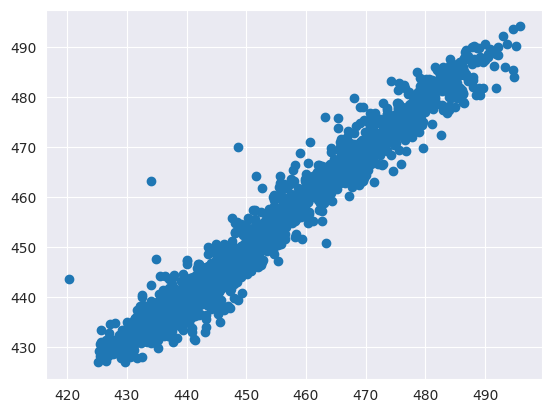

In [ ]:
#plot on prediction
plt.scatter(Y_test,Y_pred_test)
plt.show()

(416.802566813165, 499.8723956836705, 416.802566813165, 499.8723956836705)

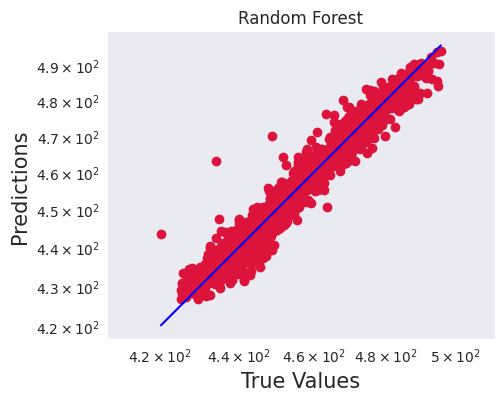

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(Y_test,Y_pred_test, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred_test), max(Y_test))
p2 = min(min(Y_pred_test), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('Random Forest')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

#10.Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
kfold1=KFold(n_splits=10)
results=cross_val_score(dtr,X,Y,cv=kfold1)

In [ ]:
results.mean()

0.9278348221622812

In [ ]:
#for predict the test values
y_predict_dtr=dtr.predict(X_test)
y_predict_dtr

array([475.  , 428.88, 450.38, ..., 436.33, 455.05, 459.18])

In [ ]:
#testing score
test_data_model_score=dtr.score(X_test,Y_test)
print ('Accuracy of test data',round(test_data_model_score,4))

train_data_model_score=dtr.score(X_train,Y_train)
print ('Accuracy of train data',round(train_data_model_score,4))


Accuracy of test data 0.926
Accuracy of train data 1.0


In [ ]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test,y_predict_dtr)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, y_predict_dtr)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Root Mean Squared Logarithmic Error (RMSLE)
rmsle = np.sqrt(mean_squared_log_error(1 + Y_test, 1 + y_predict_dtr))
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle}")

# R-squared (Coefficient of Determination)
r_squared = r2_score(Y_test,y_predict_dtr)
print(f"R-squared (R^2): {r_squared}")

Mean Absolute Error (MAE): 3.099427521008405
Mean Squared Error (MSE): 21.626646481092447
Root Mean Squared Error (RMSE): 4.6504458368088155
Root Mean Squared Logarithmic Error (RMSLE): 0.010189830117338945
R-squared (R^2): 0.9259640088263731


In [ ]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

# Evaluate the model with the best hyperparameters on the test set
best_dtr_model = grid_search.best_estimator_
y_pred = best_dtr_model.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean Squared Error on Test Set: 16.433354542711406


In [ ]:
cross_val_scores = cross_val_score(best_dtr_model, X_train, Y_train, cv=5)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

Y_pred_test = best_dtr_model.predict(X_test)
test_mse = mean_squared_error(Y_test, Y_pred_test)
test_r2 = r2_score(Y_test, Y_pred_test)

print(f'Test Mean Squared Error: {test_mse}')
print(f'Test R-squared: {test_r2}')


Test Mean Squared Error: 16.433354542711406
Test R-squared: 0.9437425634648925


In [ ]:
# Mean Absolute Error (MAE)
mae10 = mean_absolute_error(Y_test,Y_pred_test)
print(f"Mean Absolute Error (MAE): {mae10}")

# Mean Squared Error (MSE)
mse10 = mean_squared_error(Y_test, Y_pred_test)
print(f"Mean Squared Error (MSE): {mse10}")

# Root Mean Squared Error (RMSE)
rmse10 = np.sqrt(mse10)
print(f"Root Mean Squared Error (RMSE): {rmse10}")

# Root Mean Squared Logarithmic Error (RMSLE)
rmsle10 = np.sqrt(mean_squared_log_error(1 + Y_test, 1 + Y_pred_test))
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle10}")

# R-squared (Coefficient of Determination)
r_squared10 = r2_score(Y_test,Y_pred_test)
print(f"R-squared (R^2): {r_squared10}")

Mean Absolute Error (MAE): 2.968010672359644
Mean Squared Error (MSE): 16.433354542711406
Root Mean Squared Error (RMSE): 4.053807413125519
Root Mean Squared Logarithmic Error (RMSLE): 0.008894671289684155
R-squared (R^2): 0.9437425634648925


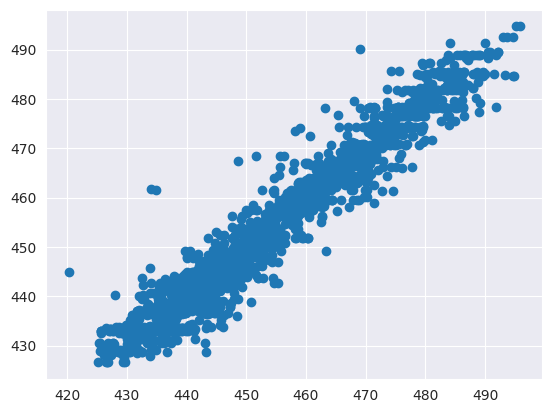

In [ ]:
#plot on prdtion
plt.scatter(Y_test, Y_pred_test)
plt.show()

(416.802566813165, 499.8723956836705, 416.802566813165, 499.8723956836705)

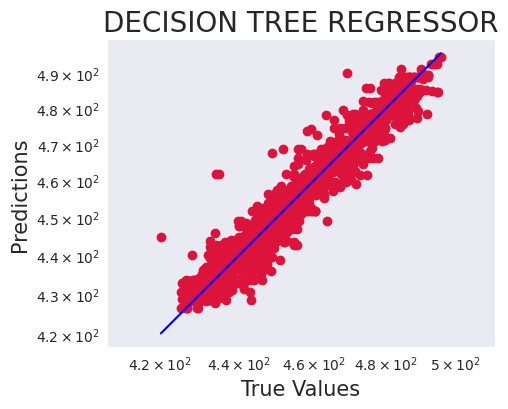

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(Y_test, Y_pred_test, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred_test), max(Y_test))
p2 = min(min(Y_pred_test), min(Y_test))
plt.title('DECISION TREE REGRESSOR',fontsize=20)
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

#11.SVR

In [ ]:
from sklearn.svm import SVR
svr_linear = SVR(kernel='linear',gamma='scale', C=1.0, epsilon=0.1)
svr_linear.fit(X_train, Y_train)

SVR(kernel='linear')

In [ ]:
kfold1=KFold(n_splits=10)
results=cross_val_score(svr_linear,X,Y,cv=kfold1)

In [ ]:
results.mean()

0.927597760313815

In [ ]:
y_predict_svr=svr_linear.predict(X_test)
y_predict_svr

array([479.17541331, 432.21411872, 447.63382721, ..., 437.27476772,
       456.02683165, 464.19478886])

In [ ]:
test_data_model_score=svr_linear.score(X_test,Y_test)
print ('Accuracy of test data',round(test_data_model_score,4))

train_data_model_score=svr_linear.score(X_train,Y_train)
print ('Accuracy of train data',round(train_data_model_score,4))

Accuracy of test data 0.9281
Accuracy of train data 0.9275


In [ ]:
mae = mean_absolute_error(Y_test,y_predict_svr)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, y_predict_svr)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Root Mean Squared Logarithmic Error (RMSLE)
rmsle = np.sqrt(mean_squared_log_error(1 + Y_test, 1 + y_predict_svr))
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle}")

# R-squared (Coefficient of Determination)
r_squared = r2_score(Y_test,y_predict_svr)
print(f"R-squared (R^2): {r_squared}")

Mean Absolute Error (MAE): 3.634230383439412
Mean Squared Error (MSE): 21.012711656593336
Root Mean Squared Error (RMSE): 4.583962440574021
Root Mean Squared Logarithmic Error (RMSLE): 0.01012356494188663
R-squared (R^2): 0.9280657342736142


In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'epsilon': [0.1, 0.2, 0.5],
}

# Create an SVR object
svr_model = SVR()

# Create a GridSearchCV object
grid_search = GridSearchCV(svr_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model from the grid search for predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Evaluate the best model
mse_best_model = mean_squared_error(Y_test, predictions)
print("Mean Squared Error (Best Model):", mse_best_model)

Best Hyperparameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
Mean Squared Error (Best Model): 16.000610026434487


In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(best_model, X_train, Y_train, cv=5)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

Y_pred_test = best_model.predict(X_test)
test_mse = mean_squared_error(Y_test, y_predict_svr)
test_r2 = r2_score(Y_test, y_predict_svr)

print(f'Test Mean Squared Error: {test_mse}')
print(f'Test R-squared: {test_r2}')


Test Mean Squared Error: 21.012711656593336
Test R-squared: 0.9280657342736142


In [ ]:
# Mean Absolute Error (MAE)
mae11= mean_absolute_error(Y_test,y_predict_svr)
print(f"Mean Absolute Error (MAE): {mae11}")

# Mean Squared Error (MSE)
mse11 = mean_squared_error(Y_test, y_predict_svr)
print(f"Mean Squared Error (MSE): {mse11}")

# Root Mean Squared Error (RMSE)
rmse11= np.sqrt(mse11)
print(f"Root Mean Squared Error (RMSE): {rmse11}")

# Root Mean Squared Logarithmic Error (RMSLE)
rmsle11 = np.sqrt(mean_squared_log_error(1 + Y_test, 1 +  Y_pred_test))
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle11}")

# R-squared (Coefficient of Determination)
r_squared11 = r2_score(Y_test,y_predict_svr)
print(f"R-squared (R^2): {r_squared11}")

Mean Absolute Error (MAE): 3.634230383439412
Mean Squared Error (MSE): 21.012711656593336
Root Mean Squared Error (RMSE): 4.583962440574021
Root Mean Squared Logarithmic Error (RMSLE): 0.008782909516658123
R-squared (R^2): 0.9280657342736142


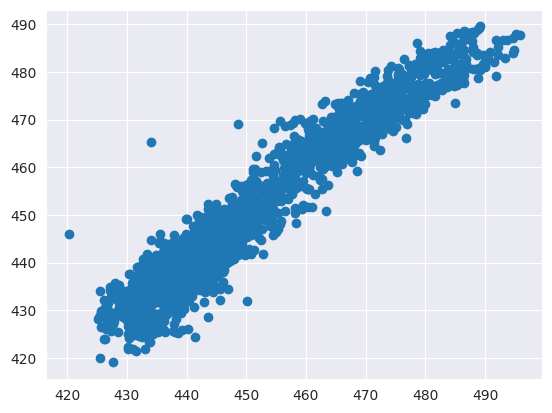

In [ ]:
plt.scatter(Y_test, y_predict_svr)
plt.show()

(415.51110994052783,
 499.94627028839795,
 415.51110994052783,
 499.94627028839795)

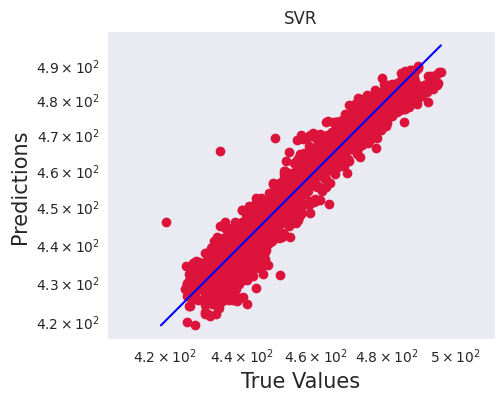

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(Y_test,y_predict_svr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_svr), max(Y_test))
p2 = min(min(y_predict_svr), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('SVR')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

#Neural network


In [ ]:
pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [ ]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0


In [ ]:
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

# Build the neural network model
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model with Mean Squared Error as the loss
model.compile(optimizer='adam', loss='mse')  # Pass 'adam' instead of optimizer object

# Train the model
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=500, batch_size=150, verbose=1)

# Evaluate on the test set
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error on Test Set: {mse}')


Epoch 1/500
41/41 [==============================] - 1s 8ms/step - loss: 206162.1406 - val_loss: 205886.4219
Epoch 2/500
41/41 [==============================] - 0s 3ms/step - loss: 205280.4375 - val_loss: 204639.1875
Epoch 3/500
41/41 [==============================] - 0s 3ms/step - loss: 203538.4062 - val_loss: 202279.1250
Epoch 4/500
41/41 [==============================] - 0s 3ms/step - loss: 200655.6719 - val_loss: 198665.1562
Epoch 5/500
41/41 [==============================] - 0s 3ms/step - loss: 196381.1250 - val_loss: 193397.5625
Epoch 6/500
41/41 [==============================] - 0s 3ms/step - loss: 190238.9844 - val_loss: 185961.8594
Epoch 7/500
41/41 [==============================] - 0s 3ms/step - loss: 181788.5000 - val_loss: 175969.2969
Epoch 8/500
41/41 [==============================] - 0s 3ms/step - loss: 170762.2031 - val_loss: 163289.5000
Epoch 9/500
41/41 [==============================] - 0s 3ms/step - loss: 157182.2812 - val_loss: 148105.8906
Epoch 10/500
41/41 

In [ ]:
# Visualize training history

# list all data in history
history.history.keys()

dict_keys(['loss', 'val_loss'])

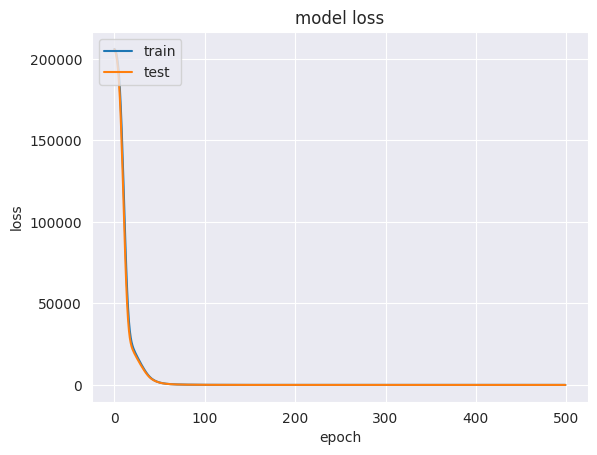

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#tabulating the values

data={'Model':pd.Series(['LinearRegression','Lasso Regression','Ridge Regression','Elastic Net','XGBoost','Ada Boost','Gradientboosting','KNeighbors_Regressor','Random forest','Decision Tree','supportvector_regressor',]),
      'MAE':pd.Series([mae1,mae2,mae3,mae4,mae5,mae6,mae7,mae8,mae9,mae10,mae11]),
      'MSE':pd.Series([mse1,mse2,mse3,mse4,mse5,mse6,mse7,mse8,mse9,mse10,mse11]),
      'RMSE':pd.Series([rmse1,rmse2,rmse3,rmse4,rmse5,rmse6,rmse7,rmse8,rmse9,rmse10,rmse11]),
      'RMSLE':pd.Series([rmsle1,rmsle2,rmsle3,rmsle4,rmsle5,rmsle6,rmsle7,rmsle8,rmsle9,rmsle10,rmsle11]),
      'R2SCORES':pd.Series([r_squared1,r_squared2,r_squared3,r_squared4,r_squared5,r_squared6,r_squared7,r_squared8,r_squared9,r_squared10,r_squared11]),
      }
pd.DataFrame(data)

Model       MAE        MSE      RMSE     RMSLE  R2SCORES
0          LinearRegression  3.626393  20.655250  4.544805  0.010015  0.929289
1          Lasso Regression  3.626291  20.654913  4.544768  0.010015  0.929291
2          Ridge Regression  3.626393  20.655250  4.544805  0.010015  0.929289
3               Elastic Net  3.626372  20.654889  4.544765  0.010015  0.929291
4                   XGBoost  2.242453   9.291883  3.048259  0.006699  0.968190
5                 Ada Boost  2.785665  14.549016  3.814317  0.008361  0.950193
6          Gradientboosting  2.177374   8.991693  2.998615  0.006588  0.969218
7      KNeighbors_Regressor  2.539503  12.735955  3.568747  0.007824  0.956400
8             Random forest  2.345933  10.399654  3.224849  0.007075  0.964398
9             Decision Tree  2.968011  16.433355  4.053807  0.008895  0.943743
10  supportvector_regressor  3.634230  21.012712  4.583962  0.008783  0.928066

In [ ]:
RESULTS=pd.DataFrame(data)
RESULTS
RESULTS.sort_values(['RMSE','R2SCORES'])

Model       MAE        MSE      RMSE     RMSLE  R2SCORES
6          Gradientboosting  2.177374   8.991693  2.998615  0.006588  0.969218
4                   XGBoost  2.242453   9.291883  3.048259  0.006699  0.968190
8             Random forest  2.345933  10.399654  3.224849  0.007075  0.964398
7      KNeighbors_Regressor  2.539503  12.735955  3.568747  0.007824  0.956400
5                 Ada Boost  2.785665  14.549016  3.814317  0.008361  0.950193
9             Decision Tree  2.968011  16.433355  4.053807  0.008895  0.943743
3               Elastic Net  3.626372  20.654889  4.544765  0.010015  0.929291
1          Lasso Regression  3.626291  20.654913  4.544768  0.010015  0.929291
2          Ridge Regression  3.626393  20.655250  4.544805  0.010015  0.929289
0          LinearRegression  3.626393  20.655250  4.544805  0.010015  0.929289
10  supportvector_regressor  3.634230  21.012712  4.583962  0.008783  0.928066